In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5

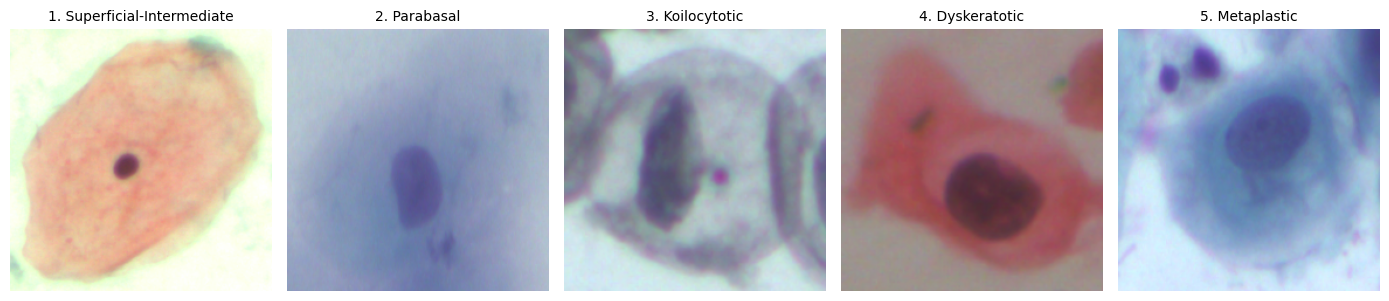

In [2]:
# ===========================
# Display 1 image per SIPaKMeD class (single row) with exact paper-style names
# ===========================
import os
import cv2
import random
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Path + classes (as in your dataset)
data_root = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
cell_types = [
    'im_Dyskeratotic',
    'im_Koilocytotic',
    'im_Metaplastic',
    'im_Parabasal',
    'im_Superficial-Intermediate'
]
image_size = (224, 224)

# Display order + exact labels as in your attached figure (c) SIPaKMeD
display_order = [
    'im_Superficial-Intermediate',
    'im_Parabasal',
    'im_Koilocytotic',
    'im_Dyskeratotic',
    'im_Metaplastic'
]
display_names = {
    'im_Superficial-Intermediate': '1. Superficial-Intermediate',
    'im_Parabasal': '2. Parabasal',
    'im_Koilocytotic': '3. Koilocytotic',
    'im_Dyskeratotic': '4. Dyskeratotic',
    'im_Metaplastic': '5. Metaplastic'
}

# Pick one random image from each class and plot in a single row
plt.figure(figsize=(14, 3))

for i, cls in enumerate(display_order):
    cropped_path = os.path.join(data_root, cls, cls, "CROPPED")
    img_list = glob(os.path.join(cropped_path, "*.bmp"))
    
    if len(img_list) == 0:
        raise FileNotFoundError(f"No .bmp images found in: {cropped_path}")
    
    img_path = random.choice(img_list)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, image_size)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(display_names[cls], fontsize=10)
    plt.axis("off")


plt.tight_layout()
plt.show()


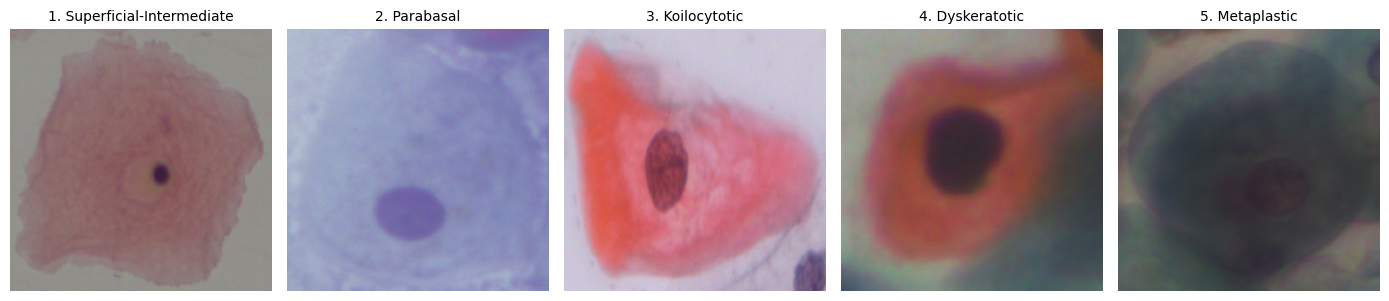

In [3]:
# ===========================
# Display 1 image per SIPaKMeD class (single row) – FIRST image only
# ===========================
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt

# Dataset root
data_root = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"

# Image size (same as used in training)
image_size = (224, 224)

# Display order + exact labels (match paper figure)
display_order = [
    'im_Superficial-Intermediate',
    'im_Parabasal',
    'im_Koilocytotic',
    'im_Dyskeratotic',
    'im_Metaplastic'
]

display_names = {
    'im_Superficial-Intermediate': '1. Superficial-Intermediate',
    'im_Parabasal': '2. Parabasal',
    'im_Koilocytotic': '3. Koilocytotic',
    'im_Dyskeratotic': '4. Dyskeratotic',
    'im_Metaplastic': '5. Metaplastic'
}

# Plot
plt.figure(figsize=(14, 3))

for i, cls in enumerate(display_order):
    cropped_path = os.path.join(data_root, cls, cls, "CROPPED")
    img_list = sorted(glob(os.path.join(cropped_path, "*.bmp")))

    if len(img_list) == 0:
        raise FileNotFoundError(f"No .bmp images found in: {cropped_path}")

    # Pick the FIRST image (deterministic)
    img_path = img_list[0]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, image_size)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(display_names[cls], fontsize=10)
    plt.axis("off")


plt.tight_layout()
plt.show()


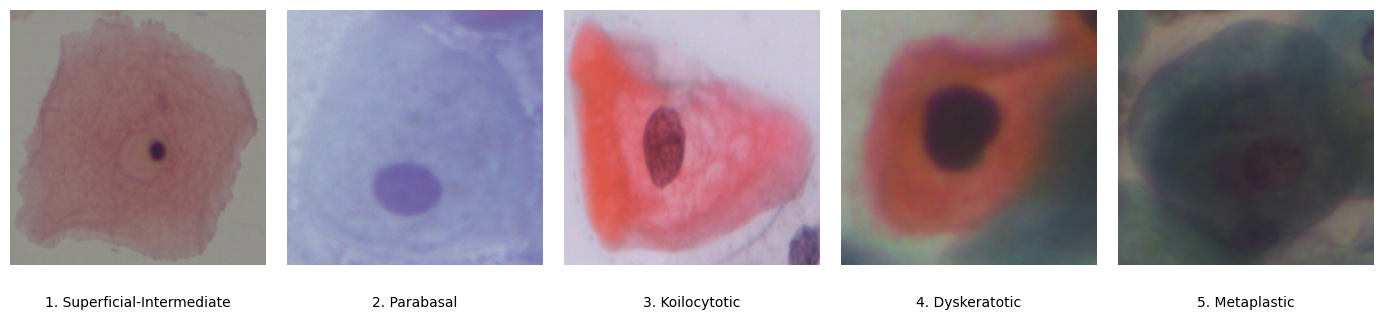

In [5]:
# ===========================
# Display 1 image per SIPaKMeD class (single row)
# Class name BELOW the image
# ===========================
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt

# Dataset root
data_root = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"

# Image size
image_size = (224, 224)

# Display order + exact labels (match paper)
display_order = [
    'im_Superficial-Intermediate',
    'im_Parabasal',
    'im_Koilocytotic',
    'im_Dyskeratotic',
    'im_Metaplastic'
]

display_names = {
    'im_Superficial-Intermediate': '1. Superficial-Intermediate',
    'im_Parabasal': '2. Parabasal',
    'im_Koilocytotic': '3. Koilocytotic',
    'im_Dyskeratotic': '4. Dyskeratotic',
    'im_Metaplastic': '5. Metaplastic'
}

# Plot
fig, axes = plt.subplots(1, 5, figsize=(14, 3))

for i, cls in enumerate(display_order):
    cropped_path = os.path.join(data_root, cls, cls, "CROPPED")
    img_list = sorted(glob(os.path.join(cropped_path, "*.bmp")))

    if len(img_list) == 0:
        raise FileNotFoundError(f"No .bmp images found in: {cropped_path}")

    # Pick the FIRST image (deterministic)
    img_path = img_list[0]

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, image_size)

    axes[i].imshow(img)
    axes[i].axis("off")

    # Put label BELOW the image
    axes[i].text(
        0.5, -0.12,
        display_names[cls],
        fontsize=10,
        ha="center",
        va="top",
        transform=axes[i].transAxes
    )


plt.tight_layout()
plt.show()


In [5]:
# =========================================
# 📦 Imports
# =========================================
import os
import cv2
import time
import numpy as np
from glob import glob

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torchvision import models
from timm import create_model

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    confusion_matrix, roc_auc_score
)

# =========================================
# ⚙️ Device
# =========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =========================================
# 📊 Load SIPaKMeD Dataset
# =========================================
data_root = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
cell_types = [
    'im_Dyskeratotic',
    'im_Koilocytotic',
    'im_Metaplastic',
    'im_Parabasal',
    'im_Superficial-Intermediate'
]
image_size = (224, 224)

X, y = [], []
label_map = {name: idx for idx, name in enumerate(cell_types)}

for cell_type in cell_types:
    cropped_path = os.path.join(data_root, cell_type, cell_type, "CROPPED")
    images = glob(os.path.join(cropped_path, "*.bmp"))

    for img_path in images:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        X.append(img)
        y.append(label_map[cell_type])

X = np.array(X, dtype=np.float32) / 255.0
y = np.array(y)
num_classes = 5

print("Dataset loaded:", X.shape, y.shape)

# =========================================
# 🔀 CNN–Transformer Hybrid
# =========================================
class CNNTransformerHybrid(nn.Module):
    def __init__(self, num_classes=5, embed_dim=256, num_heads=4, num_layers=2):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, embed_dim, 3, padding=1),
            nn.BatchNorm2d(embed_dim), nn.ReLU(),
            nn.MaxPool2d(4)
        )

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            batch_first=True,
            dropout=0.1
        )
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )

        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        B, C, H, W = x.shape
        x = x.flatten(2).transpose(1, 2)
        x = self.transformer(x)
        x = x.transpose(1, 2)
        x = self.avgpool(x).squeeze(-1)
        return self.fc(x)

# =========================================
# 🧠 Model Initialization
# =========================================
def initialize_model(model_name):
    if model_name == "alexnet":
        model = models.alexnet(weights="IMAGENET1K_V1")
        model.classifier[6] = nn.Linear(4096, num_classes)

    elif model_name == "resnet50":
        model = models.resnet50(weights="IMAGENET1K_V1")
        model.fc = nn.Linear(model.fc.in_features, num_classes)

    elif model_name == "efficientnet_b0":
        model = create_model(
            "efficientnet_b0",
            pretrained=True,
            num_classes=num_classes
        )

    elif model_name == "cnn_transformer":
        model = CNNTransformerHybrid(num_classes=num_classes)

    else:
        raise ValueError("Unknown model")

    return model.to(device)

# =========================================
# 📐 Metric Computation
# =========================================
def compute_metrics(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")
    sensitivity = recall_score(y_true, y_pred, average="macro")

    cm = confusion_matrix(y_true, y_pred)
    specificity = []
    for i in range(num_classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specificity.append(tn / (tn + fp + 1e-8))
    specificity = np.mean(specificity)

    auc = roc_auc_score(
        y_true,
        y_prob,
        multi_class="ovr",
        average="macro"
    )

    return acc, f1, sensitivity, specificity, auc

# =========================================
# ⏱️ Inference Time
# =========================================
def measure_inference_time(model, loader):
    model.eval()
    total_time, total_images = 0.0, 0
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            start = time.time()
            _ = model(images)
            total_time += (time.time() - start)
            total_images += images.size(0)
    return total_time / total_images

# =========================================
# 🧱 Training Loop (Epoch-wise logging)
# =========================================
def train_model(model, train_loader, val_loader, epochs=30, patience=5, fold_id=0):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    best_f1, patience_ctr = 0.0, 0
    best_weights = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(images), labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        model.eval()
        preds, gt, probs_all = [], [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                outputs = model(images)
                probs = torch.softmax(outputs, 1)

                preds.extend(torch.argmax(outputs, 1).cpu().numpy())
                probs_all.extend(probs.cpu().numpy())
                gt.extend(labels.numpy())

        val_acc = accuracy_score(gt, preds)
        val_f1 = f1_score(gt, preds, average="macro")

        print(
            f"[Fold {fold_id}] Epoch [{epoch+1:02d}/{epochs}] | "
            f"Train Loss: {train_loss:.4f} | "
            f"Val Acc: {val_acc:.4f} | "
            f"Val F1: {val_f1:.4f}"
        )

        if val_f1 > best_f1:
            best_f1 = val_f1
            best_weights = model.state_dict()
            patience_ctr = 0
        else:
            patience_ctr += 1

        if patience_ctr >= patience:
            print(f"⏹️ Early stopping at epoch {epoch+1} (Fold {fold_id})")
            break

    model.load_state_dict(best_weights)
    return model

# =========================================
# 🔁 5-Fold Stratified CV
# =========================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_to_train = [
    "alexnet",
    "resnet50",
    "efficientnet_b0",
    "cnn_transformer"
]

for model_name in models_to_train:
    print(f"\n{'='*20} {model_name.upper()} | 5-FOLD CV {'='*20}")

    fold_metrics, inf_times = [], []

    for fold, (tr_idx, te_idx) in enumerate(skf.split(X, y), start=1):
        print(f"\n🔁 Starting Fold {fold}/5")

        X_train, X_test = X[tr_idx], X[te_idx]
        y_train, y_test = y[tr_idx], y[te_idx]

        X_train = torch.tensor(X_train).permute(0, 3, 1, 2)
        X_test = torch.tensor(X_test).permute(0, 3, 1, 2)
        y_train = torch.tensor(y_train, dtype=torch.long)
        y_test = torch.tensor(y_test, dtype=torch.long)

        train_loader = DataLoader(
            TensorDataset(X_train, y_train),
            batch_size=32, shuffle=True
        )
        test_loader = DataLoader(
            TensorDataset(X_test, y_test),
            batch_size=32, shuffle=False
        )

        model = initialize_model(model_name)
        model = train_model(
            model,
            train_loader,
            test_loader,
            epochs=30,
            patience=5,
            fold_id=fold
        )

        model.eval()
        y_pred, y_true, y_prob = [], [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                outputs = model(images)
                probs = torch.softmax(outputs, 1).cpu().numpy()

                y_pred.extend(np.argmax(probs, axis=1))
                y_prob.extend(probs)
                y_true.extend(labels.numpy())

        fold_metrics.append(
            compute_metrics(
                np.array(y_true),
                np.array(y_pred),
                np.array(y_prob)
            )
        )

        inf_times.append(measure_inference_time(model, test_loader))

    fold_metrics = np.array(fold_metrics)

    print(f"\n📌 {model_name.upper()} — Mean ± Std (5-Fold CV)")
    print(f"Accuracy:     {fold_metrics[:,0].mean():.4f} ± {fold_metrics[:,0].std():.4f}")
    print(f"Macro F1:     {fold_metrics[:,1].mean():.4f} ± {fold_metrics[:,1].std():.4f}")
    print(f"Sensitivity:  {fold_metrics[:,2].mean():.4f} ± {fold_metrics[:,2].std():.4f}")
    print(f"Specificity:  {fold_metrics[:,3].mean():.4f} ± {fold_metrics[:,3].std():.4f}")
    print(f"AUC:          {fold_metrics[:,4].mean():.4f} ± {fold_metrics[:,4].std():.4f}")
    print(f"Inference ms/img: {np.mean(inf_times)*1000:.2f} ± {np.std(inf_times)*1000:.2f}")

print("\n✅ ALL MODELS COMPLETED")


/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

Using device: cuda
Dataset loaded: (4049, 224, 224, 3) (4049,)

==================== ALEXNET | 5-FOLD CV ====================

🔁 Starting Fold 1/5
[Fold 1] Epoch [01/30] | Train Loss: 0.5189 | Val Acc: 0.9136 | Val F1: 0.9141
[Fold 1] Epoch [02/30] | Train Loss: 0.2153 | Val Acc: 0.9111 | Val F1: 0.9115
[Fold 1] Epoch [03/30] | Train Loss: 0.2199 | Val Acc: 0.9407 | Val F1: 0.9410
[Fold 1] Epoch [04/30] | Train Loss: 0.1286 | Val Acc: 0.9148 | Val F1: 0.9131
[Fold 1] Epoch [05/30] | Train Loss: 0.1140 | Val Acc: 0.9395 | Val F1: 0.9399
[Fold 1] Epoch [06/30] | Train Loss: 0.0750 | Val Acc: 0.9481 | Val F1: 0.9481
[Fold 1] Epoch [07/30] | Train Loss: 0.0722 | Val Acc: 0.9568 | Val F1: 0.9568
[Fold 1] Epoch [08/30] | Train Loss: 0.0673 | Val Acc: 0.9395 | Val F1: 0.9393
[Fold 1] Epoch [09/30] | Train Loss: 0.0478 | Val Acc: 0.9321 | Val F1: 0.9332
[Fold 1] Epoch [10/30] | Train Loss: 0.0392 | Val Acc: 0.9395 | Val F1: 0.9396
[Fold 1] Epoch [11/30] | Train Loss: 0.0376 | Val Acc: 0.9617 |

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

[Fold 1] Epoch [01/30] | Train Loss: 0.8508 | Val Acc: 0.9222 | Val F1: 0.9223
[Fold 1] Epoch [02/30] | Train Loss: 0.1363 | Val Acc: 0.9346 | Val F1: 0.9344
[Fold 1] Epoch [03/30] | Train Loss: 0.0894 | Val Acc: 0.9333 | Val F1: 0.9331
[Fold 1] Epoch [04/30] | Train Loss: 0.0493 | Val Acc: 0.9395 | Val F1: 0.9393
[Fold 1] Epoch [05/30] | Train Loss: 0.0367 | Val Acc: 0.9432 | Val F1: 0.9434
[Fold 1] Epoch [06/30] | Train Loss: 0.0242 | Val Acc: 0.9333 | Val F1: 0.9333
[Fold 1] Epoch [07/30] | Train Loss: 0.0171 | Val Acc: 0.9420 | Val F1: 0.9420
[Fold 1] Epoch [08/30] | Train Loss: 0.0145 | Val Acc: 0.9333 | Val F1: 0.9336
[Fold 1] Epoch [09/30] | Train Loss: 0.0130 | Val Acc: 0.9395 | Val F1: 0.9394
[Fold 1] Epoch [10/30] | Train Loss: 0.0077 | Val Acc: 0.9407 | Val F1: 0.9411
⏹️ Early stopping at epoch 10 (Fold 1)

🔁 Starting Fold 2/5
[Fold 2] Epoch [01/30] | Train Loss: 0.7638 | Val Acc: 0.8963 | Val F1: 0.8960
[Fold 2] Epoch [02/30] | Train Loss: 0.1307 | Val Acc: 0.9309 | Val F1:

In [12]:
# =========================================
# 📦 FULL SIPaKMeD 5-Fold CV + Epoch-wise Logs
#    + New Metrics (Acc/F1/Sens/Spec/AUC/Inference)
#    + Wilcoxon (ResNet50 vs Others) + Holm correction
# =========================================

import os
import cv2
import time
import numpy as np
from glob import glob

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torchvision import models
from timm import create_model

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    confusion_matrix, roc_auc_score
)

from scipy.stats import wilcoxon
from statsmodels.stats.multitest import multipletests

# =========================================
# ⚙️ Reproducibility
# =========================================
SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# (optional) determinism (can reduce speed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# =========================================
# ⚙️ Device
# =========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =========================================
# 📊 Load SIPaKMeD Dataset
# =========================================
data_root = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
cell_types = [
    "im_Dyskeratotic",
    "im_Koilocytotic",
    "im_Metaplastic",
    "im_Parabasal",
    "im_Superficial-Intermediate",
]
image_size = (224, 224)

X, y = [], []
label_map = {name: idx for idx, name in enumerate(cell_types)}

for cell_type in cell_types:
    cropped_path = os.path.join(data_root, cell_type, cell_type, "CROPPED")
    images = glob(os.path.join(cropped_path, "*.bmp"))
    for img_path in images:
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        X.append(img)
        y.append(label_map[cell_type])

X = np.array(X, dtype=np.float32) / 255.0
y = np.array(y, dtype=np.int64)
num_classes = len(cell_types)

print("✅ Dataset loaded:", X.shape, y.shape)
print("✅ Class mapping:", label_map)

# =========================================
# 🔀 CNN–Transformer Hybrid
# =========================================
class CNNTransformerHybrid(nn.Module):
    def __init__(self, num_classes=5, embed_dim=256, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2),  # 112x112
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2),  # 56x56
            nn.Conv2d(128, embed_dim, 3, padding=1),
            nn.BatchNorm2d(embed_dim), nn.ReLU(),
            nn.MaxPool2d(4)   # 14x14
        )

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True, dropout=dropout
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.cnn(x)                  # [B, C, H, W]
        x = x.flatten(2).transpose(1, 2) # [B, HW, C]
        x = self.transformer(x)          # [B, HW, C]
        x = x.transpose(1, 2)            # [B, C, HW]
        x = self.avgpool(x).squeeze(-1)  # [B, C]
        return self.fc(x)

# =========================================
# 🧠 Model Initialization
# =========================================
def initialize_model(model_name: str):
    if model_name == "alexnet":
        model = models.alexnet(weights="IMAGENET1K_V1")
        model.classifier[6] = nn.Linear(4096, num_classes)

    elif model_name == "resnet50":
        model = models.resnet50(weights="IMAGENET1K_V1")
        model.fc = nn.Linear(model.fc.in_features, num_classes)

    elif model_name == "efficientnet_b0":
        model = create_model("efficientnet_b0", pretrained=True, num_classes=num_classes)

    elif model_name == "cnn_transformer":
        model = CNNTransformerHybrid(num_classes=num_classes)

    else:
        raise ValueError(f"Unknown model_name: {model_name}")

    return model.to(device)

# =========================================
# 📐 Metrics
# =========================================
def compute_specificity_macro(y_true, y_pred, num_classes: int) -> float:
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(num_classes))
    specs = []
    for i in range(num_classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specs.append(tn / (tn + fp + 1e-8))
    return float(np.mean(specs))

def compute_metrics(y_true, y_pred, y_prob, num_classes: int):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    sens = recall_score(y_true, y_pred, average="macro")
    spec = compute_specificity_macro(y_true, y_pred, num_classes)

    # y_prob must be probabilities that sum to 1 across classes (softmax outputs)
    auc = roc_auc_score(y_true, y_prob, multi_class="ovr", average="macro")
    return acc, f1m, sens, spec, auc

# =========================================
# ⏱️ Inference Time (ms/img)
# =========================================
def inference_time_ms_per_image(model, loader) -> float:
    model.eval()
    total_t, total_n = 0.0, 0
    with torch.no_grad():
        for xb, _ in loader:
            xb = xb.to(device)
            start = time.time()
            _ = model(xb)
            total_t += (time.time() - start)
            total_n += xb.size(0)
    return (total_t / max(total_n, 1)) * 1000.0

# =========================================
# 🧱 Training Loop (epoch-wise logging)
# =========================================
def train_model(
    model,
    train_loader,
    val_loader,
    epochs=30,
    patience=5,
    lr=1e-4,
    fold_id=1,
    model_name="model"
):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_f1 = -1.0
    best_state = None
    patience_ctr = 0

    for epoch in range(1, epochs + 1):
        # ---- train ----
        model.train()
        running_loss = 0.0

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            logits = model(xb)
            loss = criterion(logits, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # ---- val ----
        model.eval()
        y_true, y_pred = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                logits = model(xb)
                pred = torch.argmax(logits, dim=1).cpu().numpy()
                y_pred.extend(pred)
                y_true.extend(yb.numpy())

        val_acc = accuracy_score(y_true, y_pred)
        val_f1 = f1_score(y_true, y_pred, average="macro")

        print(
            f"[{model_name} | Fold {fold_id}] "
            f"Epoch {epoch:02d}/{epochs} | "
            f"TrainLoss={train_loss:.4f} | ValAcc={val_acc:.4f} | ValF1={val_f1:.4f}"
        )

        # ---- early stop on macro-F1 (more balanced) ----
        if val_f1 > best_f1 + 1e-6:
            best_f1 = val_f1
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            patience_ctr = 0
        else:
            patience_ctr += 1

        if patience_ctr >= patience:
            print(f"⏹️ Early stopping ({model_name} | Fold {fold_id}) at epoch {epoch}")
            break

    if best_state is None:
        best_state = model.state_dict()

    model.load_state_dict(best_state)
    return model

# =========================================
# 🔁 5-Fold Stratified CV + Store fold-wise metrics
# =========================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

models_to_train = ["alexnet", "resnet50", "efficientnet_b0", "cnn_transformer"]

all_fold_scores = {}  # model -> metric -> np.array(5,)
all_fold_inftime = {} # model -> np.array(5,)

for model_name in models_to_train:
    print(f"\n{'='*22} {model_name.upper()} | 5-FOLD CV {'='*22}")

    fold_metrics = []
    fold_infs = []

    for fold, (tr_idx, te_idx) in enumerate(skf.split(X, y), start=1):
        print(f"\n🔁 Starting Fold {fold}/5 for {model_name}...")

        X_tr, X_te = X[tr_idx], X[te_idx]
        y_tr, y_te = y[tr_idx], y[te_idx]

        X_tr_t = torch.tensor(X_tr).permute(0, 3, 1, 2)  # NCHW
        X_te_t = torch.tensor(X_te).permute(0, 3, 1, 2)
        y_tr_t = torch.tensor(y_tr, dtype=torch.long)
        y_te_t = torch.tensor(y_te, dtype=torch.long)

        train_loader = DataLoader(TensorDataset(X_tr_t, y_tr_t), batch_size=32, shuffle=True)
        val_loader   = DataLoader(TensorDataset(X_te_t, y_te_t), batch_size=32, shuffle=False)

        model = initialize_model(model_name)
        model = train_model(
            model,
            train_loader,
            val_loader,
            epochs=30,
            patience=5,
            lr=1e-4,
            fold_id=fold,
            model_name=model_name
        )

        # ---- Evaluate fold metrics ----
        model.eval()
        y_true, y_pred, y_prob = [], [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                logits = model(xb)
                probs = torch.softmax(logits, dim=1).cpu().numpy()
                pred = np.argmax(probs, axis=1)

                y_prob.extend(probs)
                y_pred.extend(pred)
                y_true.extend(yb.numpy())

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        y_prob = np.array(y_prob)

        acc, f1m, sens, spec, auc = compute_metrics(y_true, y_pred, y_prob, num_classes)
        t_ms = inference_time_ms_per_image(model, val_loader)

        print(
            f"✅ Fold {fold} Results ({model_name}) | "
            f"Acc={acc:.4f} F1={f1m:.4f} Sens={sens:.4f} Spec={spec:.4f} AUC={auc:.4f} "
            f"| Inf={t_ms:.2f} ms/img"
        )

        fold_metrics.append([acc, f1m, sens, spec, auc])
        fold_infs.append(t_ms)

    fold_metrics = np.array(fold_metrics)  # (5, 5)
    fold_infs = np.array(fold_infs)        # (5,)

    all_fold_scores[model_name] = {
        "Accuracy": fold_metrics[:, 0],
        "MacroF1": fold_metrics[:, 1],
        "Sensitivity": fold_metrics[:, 2],
        "Specificity": fold_metrics[:, 3],
        "AUC": fold_metrics[:, 4],
    }
    all_fold_inftime[model_name] = fold_infs

    print(f"\n📌 {model_name.upper()} — Mean ± Std (5-Fold CV)")
    print(f"Accuracy:     {fold_metrics[:,0].mean():.4f} ± {fold_metrics[:,0].std():.4f}")
    print(f"Macro F1:     {fold_metrics[:,1].mean():.4f} ± {fold_metrics[:,1].std():.4f}")
    print(f"Sensitivity:  {fold_metrics[:,2].mean():.4f} ± {fold_metrics[:,2].std():.4f}")
    print(f"Specificity:  {fold_metrics[:,3].mean():.4f} ± {fold_metrics[:,3].std():.4f}")
    print(f"AUC:          {fold_metrics[:,4].mean():.4f} ± {fold_metrics[:,4].std():.4f}")
    print(f"Inference ms/img: {fold_infs.mean():.2f} ± {fold_infs.std():.2f}")

print("\n✅ ALL MODELS COMPLETED")

# =========================================
# ✅ Wilcoxon Signed-Rank: ResNet50 vs Others
#    (paired by fold; use ONE primary metric)
# =========================================
best_model = "resnet50"
primary_metric = "Accuracy"  # change to "MacroF1" if you prefer

best_scores = all_fold_scores[best_model][primary_metric]

comparisons = []
pvals = []
stats = []

for m in models_to_train:
    if m == best_model:
        continue
    other_scores = all_fold_scores[m][primary_metric]

    # Wilcoxon signed-rank (paired). With only 5 folds, use exact if possible.
    stat, p = wilcoxon(best_scores, other_scores, zero_method="wilcox", alternative="two-sided", mode="auto")

    comparisons.append(f"{best_model} vs {m}")
    pvals.append(p)
    stats.append(stat)

print("\n================= WILCOXON (paired folds) =================")
print(f"Primary metric: {primary_metric}")
for c, s, p in zip(comparisons, stats, pvals):
    print(f"{c}: W={s:.4f}, p={p:.6f}")

# Holm correction (recommended for multiple comparisons)
reject, pvals_holm, _, _ = multipletests(pvals, alpha=0.05, method="holm")

print("\n=========== HOLM-CORRECTED (family-wise) ===========")
for c, p_raw, p_adj, r in zip(comparisons, pvals, pvals_holm, reject):
    print(f"{c}: p_raw={p_raw:.6f} | p_holm={p_adj:.6f} | significant={bool(r)}")


Using device: cuda
✅ Dataset loaded: (4049, 224, 224, 3) (4049,)
✅ Class mapping: {'im_Dyskeratotic': 0, 'im_Koilocytotic': 1, 'im_Metaplastic': 2, 'im_Parabasal': 3, 'im_Superficial-Intermediate': 4}

====================== ALEXNET | 5-FOLD CV ======================

🔁 Starting Fold 1/5 for alexnet...
[alexnet | Fold 1] Epoch 01/30 | TrainLoss=0.5038 | ValAcc=0.9296 | ValF1=0.9290
[alexnet | Fold 1] Epoch 02/30 | TrainLoss=0.2315 | ValAcc=0.9148 | ValF1=0.9128
[alexnet | Fold 1] Epoch 03/30 | TrainLoss=0.1608 | ValAcc=0.9444 | ValF1=0.9438
[alexnet | Fold 1] Epoch 04/30 | TrainLoss=0.1183 | ValAcc=0.9222 | ValF1=0.9224
[alexnet | Fold 1] Epoch 05/30 | TrainLoss=0.0904 | ValAcc=0.9321 | ValF1=0.9325
[alexnet | Fold 1] Epoch 06/30 | TrainLoss=0.0820 | ValAcc=0.9148 | ValF1=0.9152
[alexnet | Fold 1] Epoch 07/30 | TrainLoss=0.0695 | ValAcc=0.9358 | ValF1=0.9365
[alexnet | Fold 1] Epoch 08/30 | TrainLoss=0.0573 | ValAcc=0.9481 | ValF1=0.9490
[alexnet | Fold 1] Epoch 09/30 | TrainLoss=0.049

In [7]:
# ============================================================
# ✅ SIPAKMED ML — 5-FOLD CV + Acc/F1/Sens/Spec/AUC
# Features: HOG, LBP, SIFT-BoVW
# Models: Logistic Regression, Random Forest, Linear SVM (CALIBRATED)
# ============================================================

import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.feature import hog, local_binary_pattern
from skimage.color import rgb2gray

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cluster import MiniBatchKMeans

# ---------------------------
# Assumes you already have:
# X : (N,H,W,3) uint8 images
# y : (N,) int labels
# ---------------------------
X = X.astype(np.float32) / 255.0
y = y.astype(np.int64)
num_classes = len(np.unique(y))

# =========================================
# 📐 Metrics
# =========================================
def compute_specificity_macro(y_true, y_pred, num_classes):
    cm = confusion_matrix(y_true, y_pred)
    specs = []
    for i in range(num_classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specs.append(tn / (tn + fp + 1e-8))
    return float(np.mean(specs))

def compute_metrics(y_true, y_pred, y_prob, num_classes):
    acc  = accuracy_score(y_true, y_pred)
    f1m  = f1_score(y_true, y_pred, average="macro")
    sens = recall_score(y_true, y_pred, average="macro")
    spec = compute_specificity_macro(y_true, y_pred, num_classes)
    auc  = roc_auc_score(y_true, y_prob, multi_class="ovr", average="macro")
    return acc, f1m, sens, spec, auc

# =========================================
# 🧠 Models (Linear SVM must be calibrated)
# =========================================
def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=500, solver="liblinear"),
        "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
        "Linear SVM": LinearSVC(max_iter=8000, random_state=42)
    }

def wrap_for_auc(model, model_name):
    """
    Ensures predict_proba exists.
    - LR/RF already have predict_proba
    - LinearSVC needs CalibratedClassifierCV
    """
    if model_name == "Linear SVM":
        return CalibratedClassifierCV(model, cv=3, method="sigmoid")
    return model

# =========================================
# ⚙️ HOG / LBP extraction (precompute OK)
# =========================================
def extract_hog_all(images_float):
    feats = []
    print("🔍 Extracting HOG features...")
    for img in tqdm(images_float):
        gray = rgb2gray(img)
        f = hog(
            gray,
            orientations=9,
            pixels_per_cell=(16,16),
            cells_per_block=(2,2),
            block_norm="L2-Hys",
            visualize=False,
            feature_vector=True
        )
        feats.append(f)
    return np.array(feats, dtype=np.float32)

def extract_lbp_all(images_float, P=8, R=1, method="uniform"):
    feats = []
    print("🔍 Extracting LBP features...")
    for img in tqdm(images_float):
        gray = rgb2gray(img)
        lbp = local_binary_pattern(gray, P, R, method)
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P+3), range=(0, P+2))
        hist = hist.astype(np.float32)
        hist /= (hist.sum() + 1e-6)
        feats.append(hist)
    return np.array(feats, dtype=np.float32)

# =========================================
# ⚙️ SIFT-BoVW (fold-wise to avoid leakage)
# =========================================
def extract_sift_desc_list(images_float, n_features=400):
    sift = cv2.SIFT_create(nfeatures=n_features)
    desc_list = []
    for img in images_float:
        img_u8 = np.clip(img * 255.0, 0, 255).astype(np.uint8)
        gray = cv2.cvtColor(img_u8, cv2.COLOR_RGB2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        if des is None or len(des) == 0:
            des = np.zeros((1, 128), dtype=np.float32)
        else:
            des = des.astype(np.float32)
        desc_list.append(des)
    return desc_list

def build_bovw(desc_list, kmeans):
    X_bovw = []
    for des in desc_list:
        words = kmeans.predict(des.astype(np.float32))
        hist, _ = np.histogram(words, bins=np.arange(kmeans.n_clusters + 1))
        hist = hist.astype(np.float32)
        hist /= (hist.sum() + 1e-6)
        X_bovw.append(hist)
    return np.array(X_bovw, dtype=np.float32)

# =========================================
# 🔁 CV runner (fixed feature matrix: HOG/LBP)
# =========================================
def run_cv_for_features(X_feat, y, feature_name="HOG", n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    all_results = {}

    for model_name, base_model in get_models().items():
        print(f"\n---------- {model_name} ({feature_name}) ----------")

        fold_stats = []

        for fold, (tr_idx, te_idx) in enumerate(skf.split(X_feat, y), start=1):
            X_tr, X_te = X_feat[tr_idx], X_feat[te_idx]
            y_tr, y_te = y[tr_idx], y[te_idx]

            model = wrap_for_auc(base_model, model_name)
            model.fit(X_tr, y_tr)

            y_pred = model.predict(X_te)
            y_prob = model.predict_proba(X_te)  # ✅ probabilities sum to 1 now

            acc, f1m, sens, spec, auc = compute_metrics(y_te, y_pred, y_prob, num_classes)
            fold_stats.append([acc, f1m, sens, spec, auc])

            print(f"Fold {fold}: Acc={acc:.4f} | F1={f1m:.4f} | Sens={sens:.4f} | Spec={spec:.4f} | AUC={auc:.4f}")

        fold_stats = np.array(fold_stats, dtype=np.float64)
        mu = fold_stats.mean(axis=0)
        sd = fold_stats.std(axis=0)

        all_results[model_name] = {
            "Accuracy": (mu[0], sd[0]),
            "Macro F1": (mu[1], sd[1]),
            "Sensitivity": (mu[2], sd[2]),
            "Specificity": (mu[3], sd[3]),
            "AUC": (mu[4], sd[4]),
        }

        print(f"\n📌 {model_name} — Mean ± Std ({n_splits}-Fold)")
        for k, (m, s) in all_results[model_name].items():
            print(f"{k}: {m:.4f} ± {s:.4f}")

    return all_results

# =========================================
# 🔁 CV runner (SIFT-BoVW fold-wise)
# =========================================
def run_cv_sift_bovw(X_float, y, k=100, n_features=400, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    all_results = {}

    for model_name, base_model in get_models().items():
        print(f"\n---------- {model_name} (SIFT-BoVW) ----------")

        fold_stats = []

        for fold, (tr_idx, te_idx) in enumerate(skf.split(X_float, y), start=1):
            X_tr_img, X_te_img = X_float[tr_idx], X_float[te_idx]
            y_tr, y_te = y[tr_idx], y[te_idx]

            # Build vocab ONLY from train fold
            tr_desc = extract_sift_desc_list(X_tr_img, n_features=n_features)
            all_tr_desc = np.vstack(tr_desc).astype(np.float32)

            kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=2000)
            kmeans.fit(all_tr_desc)

            X_tr = build_bovw(tr_desc, kmeans)
            te_desc = extract_sift_desc_list(X_te_img, n_features=n_features)
            X_te = build_bovw(te_desc, kmeans)

            model = wrap_for_auc(base_model, model_name)
            model.fit(X_tr, y_tr)

            y_pred = model.predict(X_te)
            y_prob = model.predict_proba(X_te)  # ✅ calibrated for SVM

            acc, f1m, sens, spec, auc = compute_metrics(y_te, y_pred, y_prob, num_classes)
            fold_stats.append([acc, f1m, sens, spec, auc])

            print(f"Fold {fold}: Acc={acc:.4f} | F1={f1m:.4f} | Sens={sens:.4f} | Spec={spec:.4f} | AUC={auc:.4f}")

        fold_stats = np.array(fold_stats, dtype=np.float64)
        mu = fold_stats.mean(axis=0)
        sd = fold_stats.std(axis=0)

        all_results[model_name] = {
            "Accuracy": (mu[0], sd[0]),
            "Macro F1": (mu[1], sd[1]),
            "Sensitivity": (mu[2], sd[2]),
            "Specificity": (mu[3], sd[3]),
            "AUC": (mu[4], sd[4]),
        }

        print(f"\n📌 {model_name} — Mean ± Std ({n_splits}-Fold)")
        for k, (m, s) in all_results[model_name].items():
            print(f"{k}: {m:.4f} ± {s:.4f}")

    return all_results

# =========================================
# 🚀 Run (SipakMed)
# =========================================
X_hog = extract_hog_all(X)
hog_results = run_cv_for_features(X_hog, y, feature_name="HOG", n_splits=5)

X_lbp = extract_lbp_all(X)
lbp_results = run_cv_for_features(X_lbp, y, feature_name="LBP", n_splits=5)

sift_results = run_cv_sift_bovw(X, y, k=100, n_features=400, n_splits=5)

print("\n✅ DONE (SipakMed ML 5-fold CV with valid multiclass AUC).")


🔍 Extracting HOG features...


100%|██████████| 4049/4049 [00:32<00:00, 123.35it/s]



---------- Logistic Regression (HOG) ----------
Fold 1: Acc=0.6049 | F1=0.5987 | Sens=0.6050 | Spec=0.9013 | AUC=0.8511
Fold 2: Acc=0.5988 | F1=0.5949 | Sens=0.5990 | Spec=0.8997 | AUC=0.8356
Fold 3: Acc=0.6025 | F1=0.5956 | Sens=0.6030 | Spec=0.9007 | AUC=0.8372
Fold 4: Acc=0.5864 | F1=0.5723 | Sens=0.5873 | Spec=0.8966 | AUC=0.8340
Fold 5: Acc=0.6143 | F1=0.6082 | Sens=0.6152 | Spec=0.9036 | AUC=0.8418

📌 Logistic Regression — Mean ± Std (5-Fold)
Accuracy: 0.6014 ± 0.0091
Macro F1: 0.5939 ± 0.0118
Sensitivity: 0.6019 ± 0.0090
Specificity: 0.9004 ± 0.0023
AUC: 0.8399 ± 0.0062

---------- Random Forest (HOG) ----------
Fold 1: Acc=0.6802 | F1=0.6740 | Sens=0.6801 | Spec=0.9200 | AUC=0.8965
Fold 2: Acc=0.6926 | F1=0.6871 | Sens=0.6920 | Spec=0.9231 | AUC=0.8885
Fold 3: Acc=0.6259 | F1=0.6170 | Sens=0.6259 | Spec=0.9065 | AUC=0.8705
Fold 4: Acc=0.6346 | F1=0.6248 | Sens=0.6346 | Spec=0.9086 | AUC=0.8762
Fold 5: Acc=0.6897 | F1=0.6835 | Sens=0.6897 | Spec=0.9223 | AUC=0.8917

📌 Random Fo

  0%|          | 0/4049 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 4049/4049 [00:30<00:00, 130.88it/s]



---------- Logistic Regression (LBP) ----------
Fold 1: Acc=0.5790 | F1=0.5447 | Sens=0.5738 | Spec=0.8945 | AUC=0.8101
Fold 2: Acc=0.5025 | F1=0.4645 | Sens=0.4972 | Spec=0.8754 | AUC=0.8027
Fold 3: Acc=0.5284 | F1=0.4905 | Sens=0.5230 | Spec=0.8819 | AUC=0.7922
Fold 4: Acc=0.4926 | F1=0.4534 | Sens=0.4871 | Spec=0.8729 | AUC=0.7853
Fold 5: Acc=0.5661 | F1=0.5300 | Sens=0.5610 | Spec=0.8913 | AUC=0.8168

📌 Logistic Regression — Mean ± Std (5-Fold)
Accuracy: 0.5337 ± 0.0341
Macro F1: 0.4966 ± 0.0357
Sensitivity: 0.5284 ± 0.0342
Specificity: 0.8832 ± 0.0085
AUC: 0.8014 ± 0.0115

---------- Random Forest (LBP) ----------
Fold 1: Acc=0.7296 | F1=0.7262 | Sens=0.7286 | Spec=0.9324 | AUC=0.9291
Fold 2: Acc=0.7235 | F1=0.7222 | Sens=0.7224 | Spec=0.9309 | AUC=0.9268
Fold 3: Acc=0.7222 | F1=0.7143 | Sens=0.7207 | Spec=0.9306 | AUC=0.9235
Fold 4: Acc=0.7000 | F1=0.6982 | Sens=0.6990 | Spec=0.9250 | AUC=0.9219
Fold 5: Acc=0.7379 | F1=0.7356 | Sens=0.7379 | Spec=0.9345 | AUC=0.9323

📌 Random Fo

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fold 1: Acc=0.2049 | F1=0.0680 | Sens=0.2000 | Spec=0.8000 | AUC=0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fold 2: Acc=0.2049 | F1=0.0680 | Sens=0.2000 | Spec=0.8000 | AUC=0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fold 3: Acc=0.2049 | F1=0.0680 | Sens=0.2000 | Spec=0.8000 | AUC=0.5000


KeyboardInterrupt: 

📦 Loading SIPaKMeD CROPPED images...
  im_Dyskeratotic: 813 images
  im_Koilocytotic: 825 images
  im_Metaplastic: 793 images
  im_Parabasal: 787 images
  im_Superficial-Intermediate: 831 images

✅ Loaded:
X shape: (4049, 224, 224, 3), dtype: uint8
y shape: (4049,), dtype: int64
Class map: {'im_Dyskeratotic': 0, 'im_Koilocytotic': 1, 'im_Metaplastic': 2, 'im_Parabasal': 3, 'im_Superficial-Intermediate': 4}


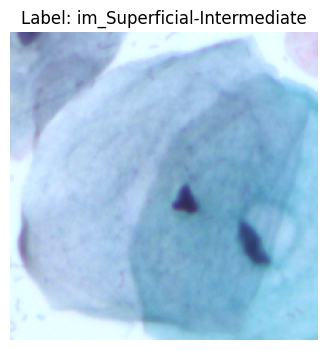


🔍 Extracting SIFT descriptors...


100%|██████████| 4049/4049 [00:39<00:00, 102.35it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


All descriptors shape: (53049, 128)

🔧 Clustering descriptors into 100 visual words...

🧠 Building BoVW features...


100%|██████████| 4049/4049 [00:01<00:00, 3354.99it/s]


SIFT-BoVW feature shape: (4049, 100)

================== Logistic Regression | SIFT-BoVW | 5-FOLD CV ==================
Fold 1: Acc=0.5296 | F1=0.5074 | Sens=0.5292 | Spec=0.8824 | AUC=0.7915
Fold 2: Acc=0.5370 | F1=0.5251 | Sens=0.5352 | Spec=0.8841 | AUC=0.7957
Fold 3: Acc=0.5420 | F1=0.5348 | Sens=0.5401 | Spec=0.8854 | AUC=0.7971
Fold 4: Acc=0.5136 | F1=0.4931 | Sens=0.5108 | Spec=0.8783 | AUC=0.7750
Fold 5: Acc=0.5303 | F1=0.5185 | Sens=0.5284 | Spec=0.8825 | AUC=0.7899

📌 Logistic Regression — Mean ± Std (5-Fold CV)
Accuracy: 0.5305 ± 0.0096
Macro F1: 0.5158 ± 0.0144
Sensitivity: 0.5288 ± 0.0099
Specificity: 0.8826 ± 0.0024
AUC: 0.7898 ± 0.0079

================== Random Forest | SIFT-BoVW | 5-FOLD CV ==================
Fold 1: Acc=0.5395 | F1=0.5286 | Sens=0.5386 | Spec=0.8849 | AUC=0.8216
Fold 2: Acc=0.5630 | F1=0.5552 | Sens=0.5611 | Spec=0.8907 | AUC=0.8279
Fold 3: Acc=0.5235 | F1=0.5143 | Sens=0.5217 | Spec=0.8809 | AUC=0.8174
Fold 4: Acc=0.5346 | F1=0.5213 | Sens=0.5323 | S

In [11]:
# ============================================================
# ✅ SIPaKMeD (Largest) — FULL PIPELINE
# 0) Load CROPPED images -> X,y
# 1) SIFT descriptors
# 2) BoVW (MiniBatchKMeans)
# 3) 5-Fold CV on ML models (LR, RF, Linear SVM calibrated)
# 4) Metrics per fold + Mean±Std: Acc, Macro-F1, Sens, Spec, AUC
# ============================================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import MiniBatchKMeans

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    confusion_matrix, roc_auc_score
)

# ============================================================
# 0) DATASET LOADING (CROPPED) -> X, y
# ============================================================

data_root = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"
cell_types = [
    "im_Dyskeratotic",
    "im_Koilocytotic",
    "im_Metaplastic",
    "im_Parabasal",
    "im_Superficial-Intermediate"
]
label_map = {name: i for i, name in enumerate(cell_types)}

image_size = (224, 224)

X, y = [], []

print("📦 Loading SIPaKMeD CROPPED images...")
for cell_type in cell_types:
    cropped_path = os.path.join(data_root, cell_type, cell_type, "CROPPED")
    images = glob(os.path.join(cropped_path, "*.bmp")) + glob(os.path.join(cropped_path, "*.BMP"))

    print(f"  {cell_type}: {len(images)} images")
    for img_path in images:
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size, interpolation=cv2.INTER_AREA)
        X.append(img)
        y.append(label_map[cell_type])

X = np.array(X, dtype=np.uint8)   # keep uint8 for SIFT stability
y = np.array(y, dtype=np.int64)

num_classes = len(cell_types)

print(f"\n✅ Loaded:")
print(f"X shape: {X.shape}, dtype: {X.dtype}")
print(f"y shape: {y.shape}, dtype: {y.dtype}")
print("Class map:", label_map)

# Optional sanity check visualization
idx = np.random.randint(0, len(X))
plt.figure(figsize=(4,4))
plt.imshow(X[idx])
plt.title(f"Label: {cell_types[y[idx]]}")
plt.axis("off")
plt.show()

# ============================================================
# 1) SIFT DESCRIPTORS (ROBUST)
# ============================================================

def extract_sift_descriptors(images, n_features=400, use_clahe_fallback=True):
    """
    Extract SIFT descriptors from images.
    Returns:
      all_descriptors: (M, 128) stacked descriptors
      image_descriptors: list of (mi, 128) per image (fallback to zeros(1,128))
    """
    sift = cv2.SIFT_create(nfeatures=n_features)

    # mild fallback to make keypoints appear if images are low-contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    all_descriptors = []
    image_descriptors = []

    print("\n🔍 Extracting SIFT descriptors...")
    for img in tqdm(images):
        # img is RGB uint8 (H,W,3)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        kp, des = sift.detectAndCompute(gray, None)

        if des is None and use_clahe_fallback:
            g2 = clahe.apply(gray)
            g2 = cv2.GaussianBlur(g2, (3, 3), 0)
            kp, des = sift.detectAndCompute(g2, None)

        if des is not None and len(des) > 0:
            des = des.astype(np.float64)
            all_descriptors.append(des)
            image_descriptors.append(des)
        else:
            image_descriptors.append(np.zeros((1, 128), dtype=np.float64))

    if len(all_descriptors) == 0:
        raise ValueError(
            "SIFT found ZERO descriptors across the dataset. "
            "This indicates images are too smooth/low-contrast after preprocessing."
        )

    all_descriptors = np.vstack(all_descriptors)
    return all_descriptors, image_descriptors

# ============================================================
# 2) BoVW (MiniBatchKMeans) (YOUR STYLE)
# ============================================================

def build_bovw_features(image_des_list, kmeans):
    bovw_features = []
    for des in tqdm(image_des_list):
        if des is None or len(des) == 0:
            hist = np.zeros(kmeans.n_clusters)
        else:
            des = des.astype(np.float64)
            words = kmeans.predict(des)
            hist, _ = np.histogram(words, bins=np.arange(kmeans.n_clusters + 1))
            hist = hist.astype("float")
            hist /= (hist.sum() + 1e-6)
        bovw_features.append(hist)
    return np.array(bovw_features)

# Build descriptors + codebook + BoVW once
all_des, img_des_list = extract_sift_descriptors(X, n_features=400, use_clahe_fallback=True)
print("All descriptors shape:", all_des.shape)

k = 100
print(f"\n🔧 Clustering descriptors into {k} visual words...")
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
kmeans.fit(all_des)

print("\n🧠 Building BoVW features...")
X_sift = build_bovw_features(img_des_list, kmeans)
print("SIFT-BoVW feature shape:", X_sift.shape)

# ============================================================
# 3) METRICS (Acc, Macro-F1, Sens, Spec, AUC)
# ============================================================

def compute_specificity_macro(y_true, y_pred, n_classes):
    cm = confusion_matrix(y_true, y_pred)
    specs = []
    for i in range(n_classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specs.append(tn / (tn + fp + 1e-8))
    return float(np.mean(specs))

def compute_metrics(y_true, y_pred, y_prob, n_classes):
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro")
    sens = recall_score(y_true, y_pred, average="macro")
    spec = compute_specificity_macro(y_true, y_pred, n_classes)
    auc = roc_auc_score(y_true, y_prob, multi_class="ovr", average="macro")
    return acc, f1m, sens, spec, auc

# ============================================================
# 4) MODELS (SVM calibrated for predict_proba)
# ============================================================

def get_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=500, solver="liblinear"),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "Linear SVM": LinearSVC(max_iter=5000, random_state=42),
    }

def ensure_proba(model, name):
    # LinearSVC has no predict_proba; calibrate to get probabilities for multiclass AUC
    if name == "Linear SVM":
        return CalibratedClassifierCV(model, cv=3, method="sigmoid")
    return model

# ============================================================
# 5) 5-FOLD CV (prints fold metrics + mean±std)
# ============================================================

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

final_results = {}

for model_name, base_model in get_models().items():
    print(f"\n{'='*18} {model_name} | SIFT-BoVW | 5-FOLD CV {'='*18}")

    fold_rows = []

    for fold, (tr_idx, te_idx) in enumerate(skf.split(X_sift, y), start=1):
        X_tr, X_te = X_sift[tr_idx], X_sift[te_idx]
        y_tr, y_te = y[tr_idx], y[te_idx]

        model = ensure_proba(base_model, model_name)
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_te)
        y_prob = model.predict_proba(X_te)  # sums to 1 -> valid for roc_auc_score multiclass

        acc, f1m, sens, spec, auc = compute_metrics(y_te, y_pred, y_prob, num_classes)
        fold_rows.append([acc, f1m, sens, spec, auc])

        print(f"Fold {fold}: "
              f"Acc={acc:.4f} | F1={f1m:.4f} | Sens={sens:.4f} | Spec={spec:.4f} | AUC={auc:.4f}")

    fold_rows = np.array(fold_rows, dtype=np.float64)
    means = fold_rows.mean(axis=0)
    stds  = fold_rows.std(axis=0)

    final_results[model_name] = {
        "Accuracy": (means[0], stds[0]),
        "Macro F1": (means[1], stds[1]),
        "Sensitivity": (means[2], stds[2]),
        "Specificity": (means[3], stds[3]),
        "AUC": (means[4], stds[4]),
    }

    print(f"\n📌 {model_name} — Mean ± Std (5-Fold CV)")
    for k_, (m, s) in final_results[model_name].items():
        print(f"{k_}: {m:.4f} ± {s:.4f}")

print("\n✅ Done: SIPaKMeD SIFT-BoVW + ML models + 5-fold CV + new metrics.")


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split
data_root = "/kaggle/input/cervical-cancer-largest-dataset-sipakmed"

cell_types = ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
image_size = (224, 224)

X, y = [], []
label_map = {name: idx for idx, name in enumerate(cell_types)}

for cell_type in cell_types:
    cropped_path = os.path.join(data_root, cell_type, cell_type, "CROPPED")
    images = glob(os.path.join(cropped_path, "*.bmp"))
    
    for img_path in images:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, image_size)
        X.append(img)
        y.append(label_map[cell_type])

X = np.array(X)
y = np.array(y)
print(f"X shape: {X.shape}, dtype: {X.dtype}")  
print(f"y shape: {y.shape}, dtype: {y.dtype}") 


X shape: (4049, 224, 224, 3), dtype: uint8
y shape: (4049,), dtype: int64


# ALexNet, VGG19,ResNet50

In [3]:
# =========================================
# 📦 Imports
# =========================================
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torchvision import models
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    confusion_matrix, roc_auc_score
)
import numpy as np
import time
import os

# =========================================
# ⚙️ Device
# =========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =========================================
# 📊 Dataset Preparation (X, y assumed)
# =========================================
X = X.astype("float32") / 255.0
num_classes = 5

# =========================================
# 🧠 Model Initialization
# =========================================
def initialize_model(model_name, num_classes):
    if model_name == "alexnet":
        model = models.alexnet(weights="IMAGENET1K_V1")
        model.classifier[6] = nn.Linear(4096, num_classes)
    elif model_name == "resnet50":
        model = models.resnet50(weights="IMAGENET1K_V1")
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    else:
        raise ValueError("Unknown model")
    return model.to(device)

# =========================================
# 📐 Metric Computation
# =========================================
def compute_metrics(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")
    sensitivity = recall_score(y_true, y_pred, average="macro")

    cm = confusion_matrix(y_true, y_pred)
    specificity_per_class = []
    for i in range(num_classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specificity_per_class.append(tn / (tn + fp + 1e-8))
    specificity = np.mean(specificity_per_class)

    auc = roc_auc_score(
        y_true,
        y_prob,
        multi_class="ovr",
        average="macro"
    )

    return acc, f1, sensitivity, specificity, auc

# =========================================
# ⏱️ Inference Time per Image
# =========================================
def measure_inference_time(model, loader):
    model.eval()
    total_time, total_images = 0.0, 0
    with torch.no_grad():
        for images, _ in loader:
            images = images.to(device)
            start = time.time()
            _ = model(images)
            end = time.time()
            total_time += (end - start)
            total_images += images.size(0)
    return total_time / total_images  # seconds per image

# =========================================
# 🧱 Training Loop
# =========================================
def train_model(model, train_loader, val_loader, epochs=30, patience=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    best_acc = 0.0
    patience_counter = 0
    best_weights = None

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(images), labels)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        preds, labels_all = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images = images.to(device)
                outputs = model(images)
                preds.extend(torch.argmax(outputs, 1).cpu().numpy())
                labels_all.extend(labels.numpy())

        acc = accuracy_score(labels_all, preds)

        if acc > best_acc:
            best_acc = acc
            best_weights = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            break

    model.load_state_dict(best_weights)
    return model

# =========================================
# 🔁 5-Fold Cross-Validation
# =========================================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models_to_train = ["alexnet", "resnet50"]

final_results = {}

for model_name in models_to_train:
    print(f"\n{'='*18} {model_name.upper()} | 5-FOLD CV {'='*18}")

    fold_metrics = []
    inference_times = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold {fold+1}/5")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        X_train = torch.tensor(np.transpose(X_train, (0, 3, 1, 2)))
        X_test = torch.tensor(np.transpose(X_test, (0, 3, 1, 2)))
        y_train = torch.tensor(y_train, dtype=torch.long)
        y_test = torch.tensor(y_test, dtype=torch.long)

        train_loader = DataLoader(
            TensorDataset(X_train, y_train),
            batch_size=32, shuffle=True
        )
        test_loader = DataLoader(
            TensorDataset(X_test, y_test),
            batch_size=32, shuffle=False
        )

        model = initialize_model(model_name, num_classes)
        model = train_model(model, train_loader, test_loader)

        # Evaluation
        model.eval()
        y_pred, y_true, y_prob = [], [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                outputs = model(images)
                probs = torch.softmax(outputs, 1).cpu().numpy()

                y_pred.extend(np.argmax(probs, axis=1))
                y_prob.extend(probs)
                y_true.extend(labels.numpy())

        metrics = compute_metrics(
            np.array(y_true),
            np.array(y_pred),
            np.array(y_prob)
        )
        fold_metrics.append(metrics)

        inf_time = measure_inference_time(model, test_loader)
        inference_times.append(inf_time)

    fold_metrics = np.array(fold_metrics)

    mean_std_results = {
        "Accuracy": (fold_metrics[:, 0].mean(), fold_metrics[:, 0].std()),
        "F1": (fold_metrics[:, 1].mean(), fold_metrics[:, 1].std()),
        "Sensitivity": (fold_metrics[:, 2].mean(), fold_metrics[:, 2].std()),
        "Specificity": (fold_metrics[:, 3].mean(), fold_metrics[:, 3].std()),
        "AUC": (fold_metrics[:, 4].mean(), fold_metrics[:, 4].std()),
        "Inference Time (ms/img)": (
            np.mean(inference_times) * 1000,
            np.std(inference_times) * 1000
        )
    }

    final_results[model_name] = mean_std_results

    # =========================================
    # 📊 Print Mean ± Std AFTER 5 FOLDS
    # =========================================
    print(f"\n📌 {model_name.upper()} — Mean ± Std (5-Fold CV)")
    for k, v in mean_std_results.items():
        print(f"{k}: {v[0]:.4f} ± {v[1]:.4f}")

# =========================================
# ✅ Done
# =========================================


Using device: cuda

================== ALEXNET | 5-FOLD CV ==================
Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5

📌 ALEXNET — Mean ± Std (5-Fold CV)
Accuracy: 0.2001 ± 0.0046
F1: 0.0667 ± 0.0013
Sensitivity: 0.2000 ± 0.0000
Specificity: 0.8000 ± 0.0000
AUC: 0.5401 ± 0.0498
Inference Time (ms/img): 0.0322 ± 0.0008

================== RESNET50 | 5-FOLD CV ==================
Fold 1/5


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 207MB/s] 


KeyboardInterrupt: 

In [14]:
# =========================================
# 📦 Imports
# =========================================
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torchvision import models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os

# =========================================
# ⚙️ Device
# =========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =========================================
# 📊 Dataset Preparation (use your X, y)
# =========================================
X = X.astype('float32') / 255.0

# Same stratified split for all models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Convert to tensors (N, C, H, W)
X_train = torch.tensor(np.transpose(X_train, (0, 3, 1, 2)))
X_test = torch.tensor(np.transpose(X_test, (0, 3, 1, 2)))
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



Using device: cuda


In [15]:
# =========================================
# 🧱 Training Function with Validation Accuracy + Early Stopping + Model Saving
# =========================================
def train_model(model, criterion, optimizer, train_loader, test_loader, model_name,
                num_epochs=30, patience=5, save_dir="./models"):
    
    os.makedirs(save_dir, exist_ok=True)
    best_acc = 0.0
    patience_counter = 0
    train_losses, val_losses, val_accuracies = [], [], []
    best_model_path = os.path.join(save_dir, f"best_{model_name}.pth")

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        preds, true_labels = [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                preds.extend(torch.argmax(outputs, 1).cpu().numpy())
                true_labels.extend(labels.cpu().numpy())

        val_loss /= len(test_loader.dataset)
        val_losses.append(val_loss)
        val_acc = accuracy_score(true_labels, preds)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1:02d}/{num_epochs}] | "
              f"Train Loss: {epoch_loss:.4f} | "
              f"Val Loss: {val_loss:.4f} | "
              f"Val Acc: {val_acc:.4f}")

        # Early stopping
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict()
            torch.save(best_model_wts, best_model_path)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"⏹️ Early stopping triggered for {model_name}.")
            break

    print(f"💾 Best model for {model_name} saved to {best_model_path} (Acc: {best_acc:.4f})")
    model.load_state_dict(torch.load(best_model_path))
    return model, train_losses, val_losses, val_accuracies, best_acc

# =========================================
# 🧠 Initialize Pretrained Models
# =========================================
def initialize_model(model_name, num_classes=5):
    if model_name == "alexnet":
        model = models.alexnet(weights="IMAGENET1K_V1")
        model.classifier[6] = nn.Linear(4096, num_classes)
    elif model_name == "vgg19":
        model = models.vgg19(weights="IMAGENET1K_V1")
        model.classifier[6] = nn.Linear(4096, num_classes)
    elif model_name == "resnet50":
        model = models.resnet50(weights="IMAGENET1K_V1")
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    else:
        raise ValueError("Unknown model name")
    return model.to(device)



========================= Training ALEXNET =========================
Epoch [01/30] | Train Loss: 0.5141 | Val Loss: 0.2500 | Val Acc: 0.9037
Epoch [02/30] | Train Loss: 0.2244 | Val Loss: 0.3485 | Val Acc: 0.8716
Epoch [03/30] | Train Loss: 0.1923 | Val Loss: 0.2551 | Val Acc: 0.8938
Epoch [04/30] | Train Loss: 0.1279 | Val Loss: 0.1807 | Val Acc: 0.9346
Epoch [05/30] | Train Loss: 0.1158 | Val Loss: 0.1759 | Val Acc: 0.9333
Epoch [06/30] | Train Loss: 0.0719 | Val Loss: 0.1985 | Val Acc: 0.9259
Epoch [07/30] | Train Loss: 0.0681 | Val Loss: 0.2397 | Val Acc: 0.9321
Epoch [08/30] | Train Loss: 0.0570 | Val Loss: 0.1891 | Val Acc: 0.9444
Epoch [09/30] | Train Loss: 0.0726 | Val Loss: 0.1517 | Val Acc: 0.9481
Epoch [10/30] | Train Loss: 0.0350 | Val Loss: 0.2258 | Val Acc: 0.9420
Epoch [11/30] | Train Loss: 0.0535 | Val Loss: 0.2672 | Val Acc: 0.9185
Epoch [12/30] | Train Loss: 0.0437 | Val Loss: 0.1718 | Val Acc: 0.9568
Epoch [13/30] | Train Loss: 0.0154 | Val Loss: 0.1882 | Val Acc: 0

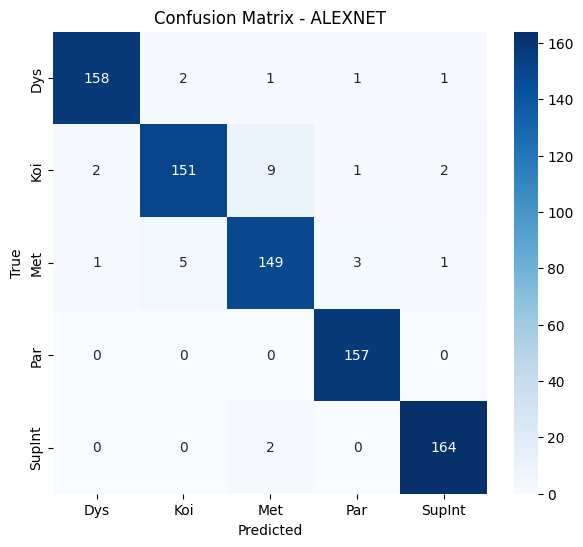


========================= Training VGG19 =========================


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:02<00:00, 217MB/s]  


Epoch [01/30] | Train Loss: 0.5682 | Val Loss: 0.6553 | Val Acc: 0.8012
Epoch [02/30] | Train Loss: 0.2554 | Val Loss: 0.1842 | Val Acc: 0.9346
Epoch [03/30] | Train Loss: 0.2013 | Val Loss: 0.2960 | Val Acc: 0.9025
Epoch [04/30] | Train Loss: 0.1830 | Val Loss: 0.2606 | Val Acc: 0.9235
Epoch [05/30] | Train Loss: 0.1274 | Val Loss: 0.1893 | Val Acc: 0.9395
Epoch [06/30] | Train Loss: 0.0887 | Val Loss: 0.1766 | Val Acc: 0.9333
Epoch [07/30] | Train Loss: 0.0842 | Val Loss: 0.3140 | Val Acc: 0.8926
Epoch [08/30] | Train Loss: 0.1495 | Val Loss: 0.1871 | Val Acc: 0.9395
Epoch [09/30] | Train Loss: 0.0551 | Val Loss: 0.2328 | Val Acc: 0.9309
Epoch [10/30] | Train Loss: 0.0298 | Val Loss: 0.2547 | Val Acc: 0.9420
Epoch [11/30] | Train Loss: 0.0819 | Val Loss: 0.4291 | Val Acc: 0.8963
Epoch [12/30] | Train Loss: 0.0708 | Val Loss: 0.1698 | Val Acc: 0.9543
Epoch [13/30] | Train Loss: 0.0482 | Val Loss: 0.1784 | Val Acc: 0.9519
Epoch [14/30] | Train Loss: 0.0791 | Val Loss: 0.2257 | Val Acc:

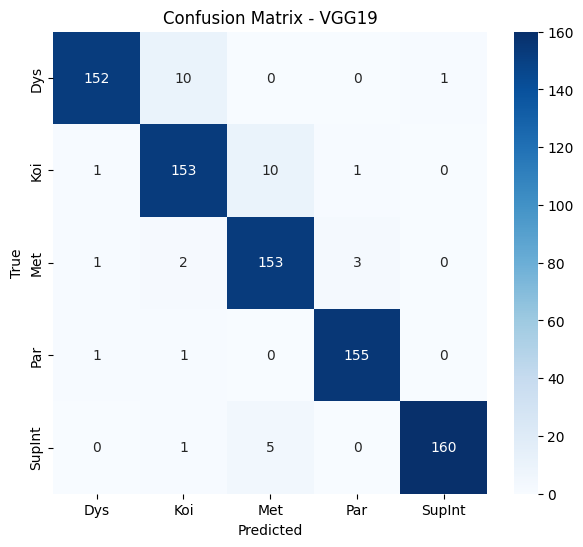


========================= Training RESNET50 =========================


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 206MB/s]


Epoch [01/30] | Train Loss: 0.3236 | Val Loss: 0.1434 | Val Acc: 0.9469
Epoch [02/30] | Train Loss: 0.1410 | Val Loss: 0.0926 | Val Acc: 0.9679
Epoch [03/30] | Train Loss: 0.0867 | Val Loss: 0.1049 | Val Acc: 0.9580
Epoch [04/30] | Train Loss: 0.0659 | Val Loss: 0.1144 | Val Acc: 0.9568
Epoch [05/30] | Train Loss: 0.0659 | Val Loss: 0.0829 | Val Acc: 0.9765
Epoch [06/30] | Train Loss: 0.0601 | Val Loss: 0.1030 | Val Acc: 0.9667
Epoch [07/30] | Train Loss: 0.0310 | Val Loss: 0.0775 | Val Acc: 0.9753
Epoch [08/30] | Train Loss: 0.0212 | Val Loss: 0.0790 | Val Acc: 0.9728
Epoch [09/30] | Train Loss: 0.0064 | Val Loss: 0.0688 | Val Acc: 0.9753
Epoch [10/30] | Train Loss: 0.0287 | Val Loss: 0.3377 | Val Acc: 0.8877
⏹️ Early stopping triggered for resnet50.
💾 Best model for resnet50 saved to ./models/best_resnet50.pth (Acc: 0.9765)

✅ Final Test Accuracy (resnet50): 0.9765
                          precision    recall  f1-score   support

            Dyskeratotic       0.94      0.99      0.

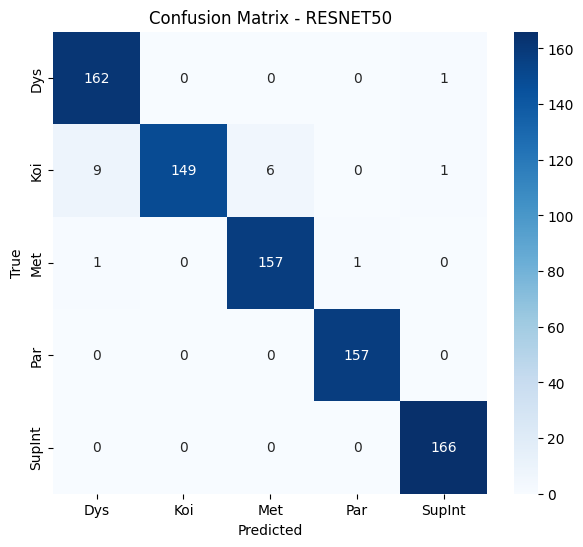

In [16]:
# =========================================
# 🚀 Train and Evaluate All Models
# =========================================
models_to_train = ["alexnet", "vgg19", "resnet50"]
results = {}

for name in models_to_train:
    print(f"\n{'='*25} Training {name.upper()} {'='*25}")
    model = initialize_model(name)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    model, train_losses, val_losses, val_accuracies, best_acc = train_model(
        model, criterion, optimizer, train_loader, test_loader,
        model_name=name, num_epochs=30, patience=5, save_dir="./models"
    )

    # Final evaluation for confusion matrix
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Final Test Accuracy ({name}): {acc:.4f}")
    print(classification_report(all_labels, all_preds, target_names=[
        'Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate'
    ]))

    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Dys', 'Koi', 'Met', 'Par', 'SupInt'],
                yticklabels=['Dys', 'Koi', 'Met', 'Par', 'SupInt'])
    plt.title(f"Confusion Matrix - {name.upper()}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    results[name] = {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "val_accuracies": val_accuracies,
        "best_acc": best_acc
    }



In [17]:
from IPython.display import FileLink
FileLink('/kaggle/working/models/best_vgg19.pth')


/kaggle/working/models/best_vgg19.pth

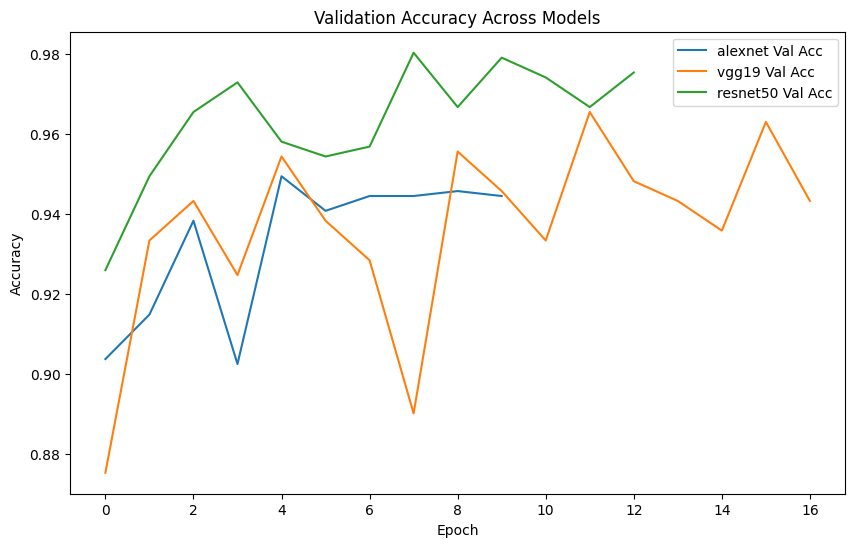

In [5]:
# =========================================
# 📉 Validation Accuracy Curves
# =========================================
plt.figure(figsize=(10,6))
for name, vals in results.items():
    plt.plot(vals["val_accuracies"], label=f'{name} Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Across Models')
plt.legend()
plt.show()


In [3]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

# EfficientNet-B0, CNN_Transformer

In [4]:
# =========================================
# 📦 Imports
# =========================================
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
from timm import create_model

# =========================================
# ⚙️ Device
# =========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# =========================================
# 📊 Dataset Preparation (use your X, y)
# =========================================
X = X.astype('float32') / 255.0

# Same stratified split for all models
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Convert to tensors (N, C, H, W)
X_train = torch.tensor(np.transpose(X_train, (0, 3, 1, 2)))
X_test = torch.tensor(np.transpose(X_test, (0, 3, 1, 2)))
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



Using device: cuda


In [7]:
# =========================================
# 🔀 Custom CNN-Transformer Hybrid
# =========================================
class CNNTransformerHybrid(nn.Module):
    """
    A simple hybrid:
      - CNN stem (3 conv blocks) for local texture
      - Flatten → patch embeddings
      - Transformer encoder for global context
      - FC head for classification
    """
    def __init__(self, num_classes=5, embed_dim=256, num_heads=4, num_layers=2):
        super(CNNTransformerHybrid, self).__init__()

        # CNN feature extractor
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2),  # 112×112
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2),  # 56×56
            nn.Conv2d(128, embed_dim, 3, padding=1), nn.BatchNorm2d(embed_dim), nn.ReLU(),
            nn.MaxPool2d(4)   # 14×14 feature map
        )

        # Transformer encoder (global modeling)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True, dropout=0.1
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Classification head
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.cnn(x)                    # [B, C, H, W]
        B, C, H, W = x.shape
        x = x.flatten(2).transpose(1, 2)   # [B, HW, C] → sequence
        x = self.transformer(x)            # contextualize tokens
        x = x.transpose(1, 2)              # [B, C, HW]
        x = self.avgpool(x).squeeze(-1)    # global avg pooling
        out = self.fc(x)
        return out

In [8]:
# =========================================
# 🧱 Training Function (Early Stopping + Save)
# =========================================
def train_model(model, criterion, optimizer, train_loader, test_loader, model_name,
                num_epochs=30, patience=5, save_dir="./models_custom"):
    
    os.makedirs(save_dir, exist_ok=True)
    best_acc, patience_counter = 0.0, 0
    train_losses, val_losses, val_accuracies = [], [], []
    best_model_path = os.path.join(save_dir, f"best_{model_name}.pth")

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Validation
        model.eval()
        val_loss, preds, true_labels = 0.0, [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * images.size(0)
                preds.extend(torch.argmax(outputs, 1).cpu().numpy())
                true_labels.extend(labels.cpu().numpy())

        val_loss /= len(test_loader.dataset)
        val_losses.append(val_loss)
        val_acc = accuracy_score(true_labels, preds)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1:02d}/{num_epochs}] | "
              f"Train Loss: {epoch_loss:.4f} | "
              f"Val Loss: {val_loss:.4f} | "
              f"Val Acc: {val_acc:.4f}")

        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), best_model_path)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"⏹️ Early stopping triggered for {model_name}.")
            break

    print(f"💾 Best {model_name} saved to {best_model_path} (Acc: {best_acc:.4f})")
    model.load_state_dict(torch.load(best_model_path))
    return model, train_losses, val_losses, val_accuracies, best_acc

# =========================================
# 🧠 Initialize Models
# =========================================
def initialize_model(model_name, num_classes=5):
    if model_name == "efficientnet_b0":
        model = create_model("efficientnet_b0", pretrained=True, num_classes=num_classes)
    elif model_name == "cnn_transformer":
        model = CNNTransformerHybrid(num_classes=num_classes)
    else:
        raise ValueError("Unknown model name")
    return model.to(device)



========================= Training EFFICIENTNET_B0 =========================
Epoch [01/30] | Train Loss: 0.7901 | Val Loss: 0.2762 | Val Acc: 0.9210
Epoch [02/30] | Train Loss: 0.1500 | Val Loss: 0.2282 | Val Acc: 0.9370
Epoch [03/30] | Train Loss: 0.0779 | Val Loss: 0.2329 | Val Acc: 0.9346
Epoch [04/30] | Train Loss: 0.0444 | Val Loss: 0.2019 | Val Acc: 0.9432
Epoch [05/30] | Train Loss: 0.0358 | Val Loss: 0.2195 | Val Acc: 0.9284
Epoch [06/30] | Train Loss: 0.0359 | Val Loss: 0.2297 | Val Acc: 0.9370
Epoch [07/30] | Train Loss: 0.0242 | Val Loss: 0.1933 | Val Acc: 0.9481
Epoch [08/30] | Train Loss: 0.0150 | Val Loss: 0.1815 | Val Acc: 0.9543
Epoch [09/30] | Train Loss: 0.0232 | Val Loss: 0.1990 | Val Acc: 0.9469
Epoch [10/30] | Train Loss: 0.0120 | Val Loss: 0.1820 | Val Acc: 0.9556
Epoch [11/30] | Train Loss: 0.0098 | Val Loss: 0.1865 | Val Acc: 0.9519
Epoch [12/30] | Train Loss: 0.0108 | Val Loss: 0.1892 | Val Acc: 0.9506
Epoch [13/30] | Train Loss: 0.0145 | Val Loss: 0.2047 | Va

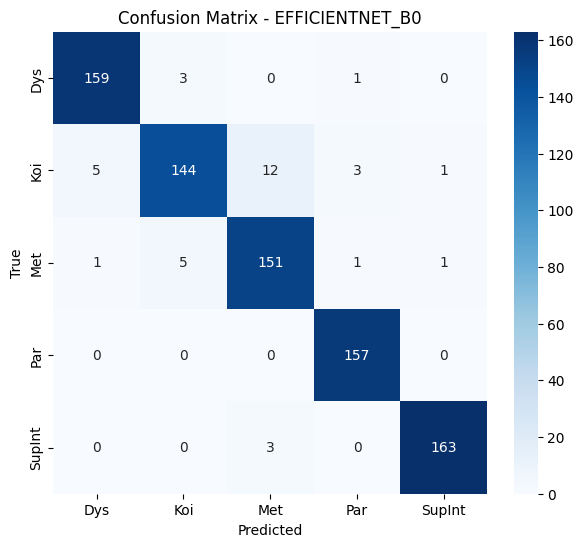


========================= Training CNN_TRANSFORMER =========================
Epoch [01/30] | Train Loss: 0.7046 | Val Loss: 0.3805 | Val Acc: 0.8679
Epoch [02/30] | Train Loss: 0.4704 | Val Loss: 0.2999 | Val Acc: 0.8901
Epoch [03/30] | Train Loss: 0.3636 | Val Loss: 0.2116 | Val Acc: 0.9321
Epoch [04/30] | Train Loss: 0.2973 | Val Loss: 0.2042 | Val Acc: 0.9272
Epoch [05/30] | Train Loss: 0.2557 | Val Loss: 0.1868 | Val Acc: 0.9247
Epoch [06/30] | Train Loss: 0.2321 | Val Loss: 0.1761 | Val Acc: 0.9395
Epoch [07/30] | Train Loss: 0.1938 | Val Loss: 0.1523 | Val Acc: 0.9543
Epoch [08/30] | Train Loss: 0.1808 | Val Loss: 0.1289 | Val Acc: 0.9506
Epoch [09/30] | Train Loss: 0.1631 | Val Loss: 0.1607 | Val Acc: 0.9395
Epoch [10/30] | Train Loss: 0.1628 | Val Loss: 0.2086 | Val Acc: 0.9309
Epoch [11/30] | Train Loss: 0.1549 | Val Loss: 0.1343 | Val Acc: 0.9543
Epoch [12/30] | Train Loss: 0.1440 | Val Loss: 0.1314 | Val Acc: 0.9580
Epoch [13/30] | Train Loss: 0.1209 | Val Loss: 0.1488 | Va

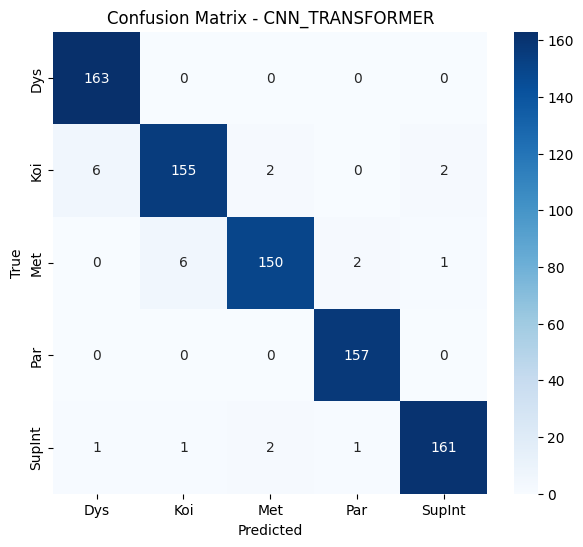

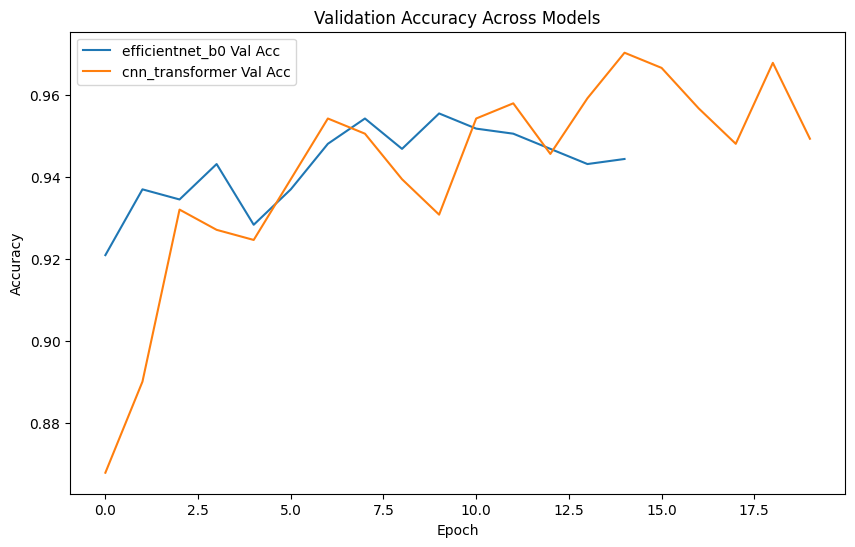

In [9]:
# =========================================
# 🚀 Train and Evaluate
# =========================================
models_to_train = ["efficientnet_b0", "cnn_transformer"]
results = {}

for name in models_to_train:
    print(f"\n{'='*25} Training {name.upper()} {'='*25}")
    model = initialize_model(name)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-4)

    model, train_losses, val_losses, val_accuracies, best_acc = train_model(
        model, criterion, optimizer, train_loader, test_loader,
        model_name=name, num_epochs=30, patience=5
    )

    # Confusion Matrix
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ Final Test Accuracy ({name}): {acc:.4f}")
    print(classification_report(all_labels, all_preds, target_names=[
        'Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate'
    ]))

    plt.figure(figsize=(7, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Dys', 'Koi', 'Met', 'Par', 'SupInt'],
                yticklabels=['Dys', 'Koi', 'Met', 'Par', 'SupInt'])
    plt.title(f"Confusion Matrix - {name.upper()}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    results[name] = {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "val_accuracies": val_accuracies,
        "best_acc": best_acc
    }

# =========================================
# 📉 Validation Accuracy Curves
# =========================================
plt.figure(figsize=(10,6))
for name, vals in results.items():
    plt.plot(vals["val_accuracies"], label=f'{name} Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Across Models')
plt.legend()
plt.show()

In [ ]:
# =========================================
# 📉 Validation Accuracy Curves
# =========================================
plt.figure(figsize=(10,6))
for name, vals in results.items():
    plt.plot(vals["val_accuracies"], label=f'{name} Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Across Models')
plt.legend()
plt.show()


# HOG

Extracting HOG features...


100%|██████████| 4049/4049 [02:36<00:00, 25.95it/s]


HOG feature shape: (4049, 6084)
Example visualization for image 0:


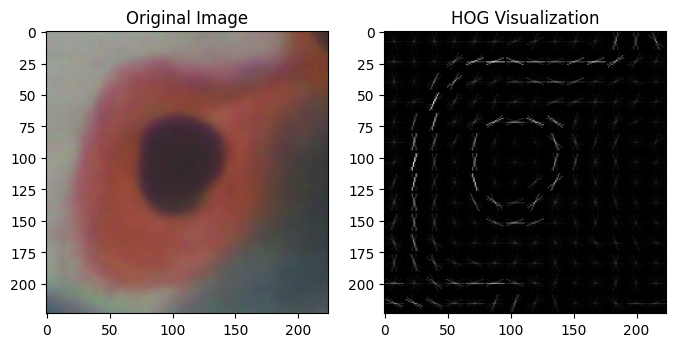

In [2]:
# =========================================
# 📦 Imports
# =========================================
import numpy as np
from skimage.feature import hog
from skimage.color import rgb2gray
from tqdm import tqdm

# =========================================
# ⚙️ HOG Feature Extraction
# =========================================
def extract_hog_features(images, visualize=False):
    """
    Extract HOG features for all images.
    Args:
        images: numpy array (N, H, W, 3)
        visualize: bool, if True returns both features and HOG visualization images
    Returns:
        features: list of feature vectors
        hog_images: list of HOG visualizations (if visualize=True)
    """
    hog_features = []
    hog_images = []

    print("Extracting HOG features...")
    for img in tqdm(images):
        gray = rgb2gray(img)

        # HOG Parameters (tuned for cytology textures)
        feature, hog_image = hog(
            gray,
            orientations=9,       # number of gradient bins
            pixels_per_cell=(16, 16),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            visualize=True,
            feature_vector=True
        )

        hog_features.append(feature)
        if visualize:
            hog_images.append(hog_image)

    if visualize:
        return np.array(hog_features), np.array(hog_images)
    else:
        return np.array(hog_features)

# =========================================
# 🚀 Apply to Dataset
# =========================================
# Assuming X and y are your image data and labels (from earlier)
X_hog, X_hog_viz = extract_hog_features(X, visualize=True)

print(f"HOG feature shape: {X_hog.shape}")
print(f"Example visualization for image 0:")

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.imshow(X[0])
ax1.set_title("Original Image")
ax2.imshow(X_hog_viz[0], cmap='gray')
ax2.set_title("HOG Visualization")
plt.show()



==================== Logistic Regression ====================
Accuracy: 0.5877
              precision    recall  f1-score   support

           0       0.61      0.55      0.58       163
           1       0.44      0.29      0.35       165
           2       0.59      0.56      0.57       159
           3       0.59      0.75      0.66       157
           4       0.65      0.79      0.71       166

    accuracy                           0.59       810
   macro avg       0.58      0.59      0.58       810
weighted avg       0.58      0.59      0.57       810



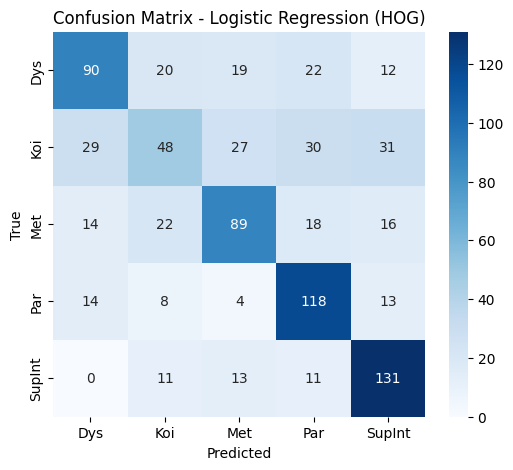


==================== Random Forest ====================
Accuracy: 0.6407
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       163
           1       0.60      0.44      0.51       165
           2       0.59      0.54      0.56       159
           3       0.72      0.78      0.75       157
           4       0.70      0.88      0.78       166

    accuracy                           0.64       810
   macro avg       0.63      0.64      0.63       810
weighted avg       0.63      0.64      0.63       810



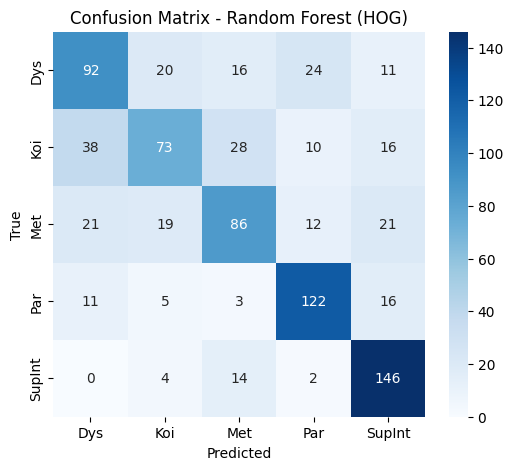


==================== Linear SVM ====================
Accuracy: 0.5432
              precision    recall  f1-score   support

           0       0.57      0.52      0.54       163
           1       0.38      0.30      0.34       165
           2       0.52      0.51      0.52       159
           3       0.58      0.71      0.64       157
           4       0.62      0.67      0.65       166

    accuracy                           0.54       810
   macro avg       0.53      0.54      0.54       810
weighted avg       0.53      0.54      0.54       810



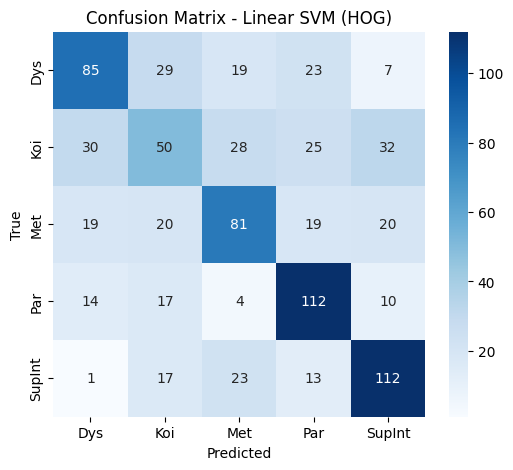

In [3]:
# =========================================
# 📦 Imports
# =========================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# =========================================
# ⚙️ Split Data
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_hog, y, test_size=0.2, stratify=y, random_state=42
)

# =========================================
# 🧠 Model Training
# =========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=300, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Linear SVM": LinearSVC(max_iter=5000, random_state=42)
}

trained_models = {}

for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Dys', 'Koi', 'Met', 'Par', 'SupInt'],
                yticklabels=['Dys', 'Koi', 'Met', 'Par', 'SupInt'])
    plt.title(f"Confusion Matrix - {name} (HOG)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    trained_models[name] = model


In [7]:
# =========================================
# 🧭 Unified HOG Feature Importance Visualization (All Models)
# =========================================
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import os

def visualize_hog_importance_for_class(model, model_name, class_idx, class_name, image,
                                       orientations=9, pixels_per_cell=(16,16),
                                       cells_per_block=(2,2), output_dir="./hog_importance_maps"):
    """
    Visualize class-specific HOG importance heatmap on top of an image.
    Works for:
      - Logistic Regression (coef_)
      - Linear SVM (coef_)
      - Random Forest (feature_importances_ averaged)
    Saves output as image for each model + class.
    """
    os.makedirs(output_dir, exist_ok=True)
    gray = rgb2gray(image)

    # Compute HOG for this image
    feature, hog_image = hog(
        gray,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        block_norm='L2-Hys',
        visualize=True,
        feature_vector=True
    )

    # Compute the expected HOG grid shape
    n_cells_y = gray.shape[0] // pixels_per_cell[0]
    n_cells_x = gray.shape[1] // pixels_per_cell[1]
    spatial_shape = (n_cells_y - cells_per_block[0] + 1,
                     n_cells_x - cells_per_block[1] + 1,
                     orientations)
    expected_size = np.prod(spatial_shape)

    # =============================
    # Model-specific importance
    # =============================
    if model_name in ["Logistic Regression", "Linear SVM"]:
        coef = model.coef_[class_idx]

        # 🔒 Auto-handle HOG shape mismatch
        if coef.size != expected_size:
            print(f"[⚠️] Shape mismatch for {model_name} ({class_name}): expected {expected_size}, got {coef.size}. Auto-adjusting.")
            n_cells_total = coef.size // orientations
            n_side = int(np.sqrt(n_cells_total))
            spatial_shape = (n_side, n_side, orientations)

        importance_map = np.abs(coef).reshape(spatial_shape).sum(axis=2)

    elif model_name == "Random Forest":
        importance = model.feature_importances_

        # 🔒 Auto-handle HOG shape mismatch
        if importance.size != expected_size:
            print(f"[⚠️] Shape mismatch for Random Forest ({class_name}): expected {expected_size}, got {importance.size}. Auto-adjusting.")
            n_cells_total = importance.size // orientations
            n_side = int(np.sqrt(n_cells_total))
            spatial_shape = (n_side, n_side, orientations)

        importance_map = np.abs(importance).reshape(spatial_shape).sum(axis=2)

    else:
        raise ValueError(f"Unsupported model: {model_name}")

    # Normalize and upscale for overlay
    importance_map = exposure.rescale_intensity(importance_map, in_range='image', out_range=(0, 1))
    importance_map_resized = np.kron(importance_map, np.ones(pixels_per_cell))

    # Plot overlay (original vs HOG+importance)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image ({class_name})")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.imshow(importance_map_resized, cmap='jet', alpha=0.45)
    plt.title(f"HOG Importance Heatmap\n{model_name} ({class_name})")
    plt.axis("off")

    plt.tight_layout()

    # Save the resulting heatmap
    save_path = os.path.join(output_dir, f"{model_name.replace(' ', '_')}_{class_name}.png")
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()

    print(f"✅ Saved heatmap for {model_name} ({class_name}) → {save_path}")


In [8]:
# Class names in order
class_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']

# Folder to save visualizations
output_dir = "./hog_importance_maps"

for model_name, model in trained_models.items():
    print(f"\n=== Generating HOG XAI Heatmaps for {model_name} ===")
    for class_idx, cname in enumerate(class_names):
        img_idx = np.where(y == class_idx)[0][0]
        visualize_hog_importance_for_class(
            model, model_name, class_idx, cname, X[img_idx],
            orientations=9,
            pixels_per_cell=(16,16),
            cells_per_block=(2,2),
            output_dir=output_dir
        )




=== Generating HOG XAI Heatmaps for Logistic Regression ===
[⚠️] Shape mismatch for Logistic Regression (Dyskeratotic): expected 1521, got 6084. Auto-adjusting.
✅ Saved heatmap for Logistic Regression (Dyskeratotic) → ./hog_importance_maps/Logistic_Regression_Dyskeratotic.png
[⚠️] Shape mismatch for Logistic Regression (Koilocytotic): expected 1521, got 6084. Auto-adjusting.
✅ Saved heatmap for Logistic Regression (Koilocytotic) → ./hog_importance_maps/Logistic_Regression_Koilocytotic.png
[⚠️] Shape mismatch for Logistic Regression (Metaplastic): expected 1521, got 6084. Auto-adjusting.
✅ Saved heatmap for Logistic Regression (Metaplastic) → ./hog_importance_maps/Logistic_Regression_Metaplastic.png
[⚠️] Shape mismatch for Logistic Regression (Parabasal): expected 1521, got 6084. Auto-adjusting.
✅ Saved heatmap for Logistic Regression (Parabasal) → ./hog_importance_maps/Logistic_Regression_Parabasal.png
[⚠️] Shape mismatch for Logistic Regression (Superficial-Intermediate): expected 15

# LBP

In [9]:
# =========================================
# 📦 Imports
# =========================================
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from tqdm import tqdm

# =========================================
# ⚙️ LBP Feature Extraction
# =========================================
def extract_lbp_features(images, P=8, R=1, method='uniform', visualize=False):
    """
    Extract LBP histograms for each image.
    Args:
        images : numpy array (N, H, W, 3)
        P : number of circularly symmetric neighbor set points
        R : radius of circle
        method : 'uniform' gives rotation-invariant binary patterns
        visualize : if True, also return LBP images
    Returns:
        features : (N, P+2) histogram for each image
        lbp_images : (optional) visual LBP maps
    """
    lbp_features, lbp_images = [], []
    print("Extracting LBP features...")
    for img in tqdm(images):
        gray = rgb2gray(img)
        lbp = local_binary_pattern(gray, P, R, method)
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P+3), range=(0, P+2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-6)
        lbp_features.append(hist)
        if visualize:
            lbp_images.append(lbp)
    if visualize:
        return np.array(lbp_features), np.array(lbp_images)
    else:
        return np.array(lbp_features)

# =========================================
# 🚀 Apply to Dataset
# =========================================
X_lbp, X_lbp_viz = extract_lbp_features(X, visualize=True)
print(f"LBP feature shape: {X_lbp.shape}")


Extracting LBP features...


  0%|          | 0/4049 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 4049/4049 [00:33<00:00, 120.26it/s]


LBP feature shape: (4049, 10)



==================== Logistic Regression (LBP) ====================
Accuracy: 0.5173
              precision    recall  f1-score   support

           0       0.56      0.45      0.50       163
           1       0.54      0.73      0.62       165
           2       0.47      0.21      0.29       159
           3       0.41      0.29      0.34       157
           4       0.53      0.89      0.67       166

    accuracy                           0.52       810
   macro avg       0.50      0.51      0.48       810
weighted avg       0.50      0.52      0.49       810



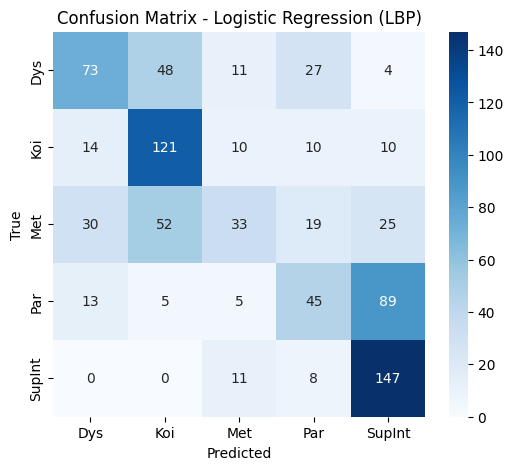


==================== Random Forest (LBP) ====================
Accuracy: 0.7420
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       163
           1       0.63      0.68      0.65       165
           2       0.61      0.52      0.56       159
           3       0.77      0.86      0.81       157
           4       0.90      0.93      0.91       166

    accuracy                           0.74       810
   macro avg       0.74      0.74      0.74       810
weighted avg       0.74      0.74      0.74       810



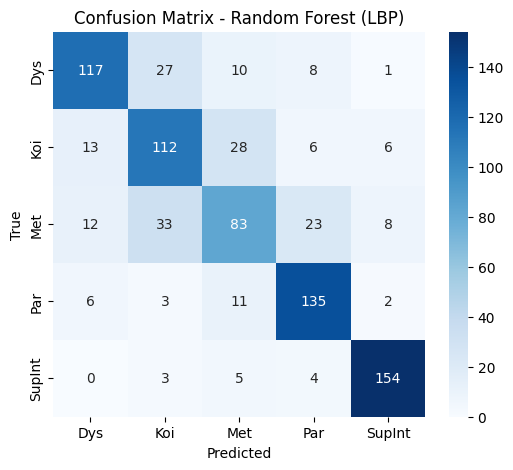


==================== Linear SVM (LBP) ====================
Accuracy: 0.5951
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       163
           1       0.53      0.75      0.62       165
           2       0.44      0.09      0.15       159
           3       0.56      0.60      0.58       157
           4       0.68      0.93      0.79       166

    accuracy                           0.60       810
   macro avg       0.57      0.59      0.55       810
weighted avg       0.57      0.60      0.55       810



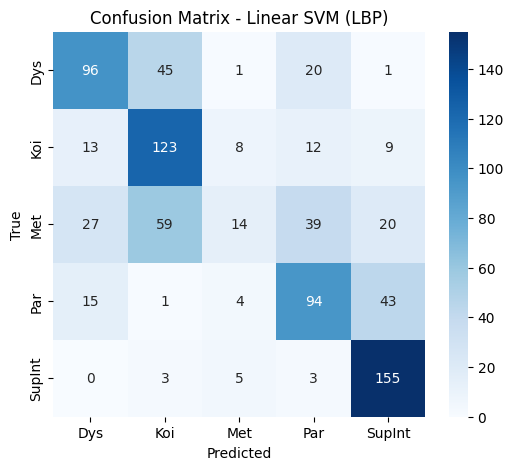

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_lbp, y, test_size=0.2, stratify=y, random_state=42
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=300, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Linear SVM": LinearSVC(max_iter=5000, random_state=42)
}

trained_models_lbp = {}
for name, model in models.items():
    print(f"\n{'='*20} {name} (LBP) {'='*20}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Dys','Koi','Met','Par','SupInt'],
                yticklabels=['Dys','Koi','Met','Par','SupInt'])
    plt.title(f"Confusion Matrix - {name} (LBP)")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.show()
    trained_models_lbp[name] = model


In [11]:
import os
from skimage import exposure

def visualize_lbp_importance_for_class(model, model_name, class_idx, class_name,
                                       image, lbp_image, P=8, output_dir="./lbp_importance_maps"):
    os.makedirs(output_dir, exist_ok=True)

    # Model-specific importance (same logic as before)
    if model_name in ["Logistic Regression", "Linear SVM"]:
        coef = model.coef_[class_idx]
        importance = np.abs(coef)
    elif model_name == "Random Forest":
        importance = model.feature_importances_
    else:
        raise ValueError(f"Unsupported model {model_name}")

    # Normalize importances
    importance = exposure.rescale_intensity(importance, in_range='image', out_range=(0,1))

    # Create per-bin mask
    importance_mask = np.zeros_like(lbp_image, dtype=float)
    for b in range(len(importance)):
        importance_mask[lbp_image == b] = importance[b]

    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title(f"Original ({class_name})"); plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(lbp_image, cmap='gray')
    plt.imshow(importance_mask, cmap='jet', alpha=0.45)
    plt.title(f"LBP Importance Heatmap\n{model_name} ({class_name})")
    plt.axis("off")

    save_path = os.path.join(output_dir, f"{model_name.replace(' ','_')}_{class_name}.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()
    print(f"✅ Saved LBP heatmap for {model_name} ({class_name}) → {save_path}")


In [12]:
class_names = ['Dyskeratotic','Koilocytotic','Metaplastic','Parabasal','Superficial-Intermediate']
output_dir = "./lbp_importance_maps"

for model_name, model in trained_models_lbp.items():
    print(f"\n=== Generating LBP XAI Heatmaps for {model_name} ===")
    for class_idx, cname in enumerate(class_names):
        img_idx = np.where(y == class_idx)[0][0]
        visualize_lbp_importance_for_class(
            model, model_name, class_idx, cname,
            X[img_idx], X_lbp_viz[img_idx],
            P=8, output_dir=output_dir
        )



=== Generating LBP XAI Heatmaps for Logistic Regression ===
✅ Saved LBP heatmap for Logistic Regression (Dyskeratotic) → ./lbp_importance_maps/Logistic_Regression_Dyskeratotic.png
✅ Saved LBP heatmap for Logistic Regression (Koilocytotic) → ./lbp_importance_maps/Logistic_Regression_Koilocytotic.png
✅ Saved LBP heatmap for Logistic Regression (Metaplastic) → ./lbp_importance_maps/Logistic_Regression_Metaplastic.png
✅ Saved LBP heatmap for Logistic Regression (Parabasal) → ./lbp_importance_maps/Logistic_Regression_Parabasal.png
✅ Saved LBP heatmap for Logistic Regression (Superficial-Intermediate) → ./lbp_importance_maps/Logistic_Regression_Superficial-Intermediate.png

=== Generating LBP XAI Heatmaps for Random Forest ===
✅ Saved LBP heatmap for Random Forest (Dyskeratotic) → ./lbp_importance_maps/Random_Forest_Dyskeratotic.png
✅ Saved LBP heatmap for Random Forest (Koilocytotic) → ./lbp_importance_maps/Random_Forest_Koilocytotic.png
✅ Saved LBP heatmap for Random Forest (Metaplastic) 

# SIFT

In [17]:
# =========================================
# 📦 Imports
# =========================================
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.cluster import MiniBatchKMeans

# =========================================
# ⚙️ Step 1: Extract SIFT descriptors for all images
# =========================================
def extract_sift_descriptors(images, n_features=500):
    """
    Extract SIFT descriptors from a list/array of images.
    Returns a list of descriptor arrays (one per image).
    """
    sift = cv2.SIFT_create(nfeatures=n_features)
    all_descriptors = []
    image_descriptors = []

    print("Extracting SIFT descriptors...")
    for img in tqdm(images):
        gray = cv2.cvtColor((img*255).astype('uint8'), cv2.COLOR_RGB2GRAY) if img.max() <= 1 else cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        kp, des = sift.detectAndCompute(gray, None)
        if des is not None:
            des = des.astype(np.float64)   # ✅ Correctly assign back
            all_descriptors.append(des)
            image_descriptors.append(des)
        else:
            image_descriptors.append(np.zeros((1, 128), dtype=np.float64))  # ✅ keep dtype consistent
    return np.vstack(all_descriptors), image_descriptors

# =========================================
# 🚀 Extract Descriptors
# =========================================
all_des, img_des_list = extract_sift_descriptors(X, n_features=400)
print("All descriptors shape:", all_des.shape)

# =========================================
# ⚙️ Step 2: Build Codebook and BoVW Vectors
# =========================================
k = 100  # number of visual words (tunable)
print(f"Clustering descriptors into {k} visual words...")
kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
kmeans.fit(all_des)

def build_bovw_features(image_des_list, kmeans):
    bovw_features = []
    for des in tqdm(image_des_list):
        if des is None or len(des) == 0:
            hist = np.zeros(kmeans.n_clusters)
        else:
            des = des.astype(np.float64)   # ✅ Ensure dtype again before predict
            words = kmeans.predict(des)
            hist, _ = np.histogram(words, bins=np.arange(kmeans.n_clusters + 1))
            hist = hist.astype("float")
            hist /= (hist.sum() + 1e-6)
        bovw_features.append(hist)
    return np.array(bovw_features)

# =========================================
# 🧠 Create BoVW feature vectors
# =========================================
X_sift = build_bovw_features(img_des_list, kmeans)
print(f"SIFT-BoVW feature shape: {X_sift.shape}")


Extracting SIFT descriptors...


100%|██████████| 4049/4049 [00:39<00:00, 103.36it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


All descriptors shape: (51122, 128)
Clustering descriptors into 100 visual words...


100%|██████████| 4049/4049 [00:01<00:00, 3229.95it/s]

SIFT-BoVW feature shape: (4049, 100)



==================== Logistic Regression (SIFT-BoVW) ====================
Accuracy: 0.5321
              precision    recall  f1-score   support

           0       0.41      0.16      0.23       163
           1       0.52      0.67      0.58       165
           2       0.53      0.42      0.47       159
           3       0.50      0.66      0.57       157
           4       0.62      0.75      0.68       166

    accuracy                           0.53       810
   macro avg       0.52      0.53      0.51       810
weighted avg       0.52      0.53      0.51       810



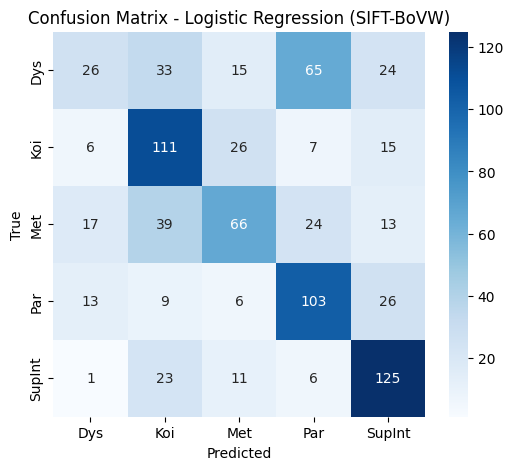


==================== Random Forest (SIFT-BoVW) ====================
Accuracy: 0.5519
              precision    recall  f1-score   support

           0       0.31      0.18      0.23       163
           1       0.58      0.55      0.56       165
           2       0.49      0.49      0.49       159
           3       0.51      0.71      0.59       157
           4       0.76      0.83      0.80       166

    accuracy                           0.55       810
   macro avg       0.53      0.55      0.53       810
weighted avg       0.53      0.55      0.53       810



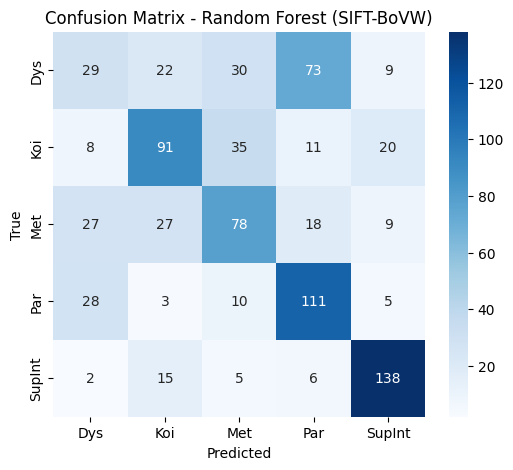


==================== Linear SVM (SIFT-BoVW) ====================
Accuracy: 0.5222
              precision    recall  f1-score   support

           0       0.37      0.14      0.20       163
           1       0.52      0.58      0.55       165
           2       0.53      0.45      0.48       159
           3       0.49      0.69      0.57       157
           4       0.60      0.76      0.67       166

    accuracy                           0.52       810
   macro avg       0.50      0.52      0.50       810
weighted avg       0.50      0.52      0.50       810



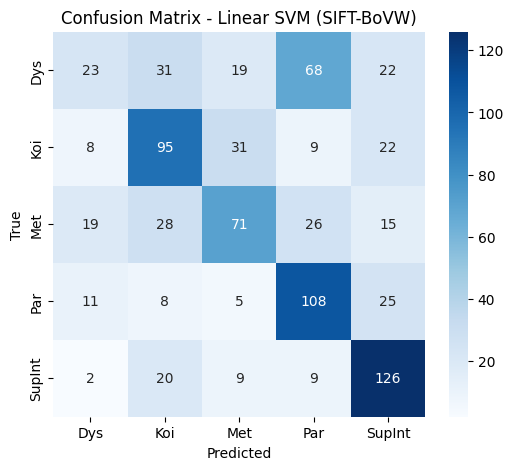

In [18]:
# =========================================
# 🧠 Train ML models on SIFT-BoVW features
# =========================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(
    X_sift, y, test_size=0.2, stratify=y, random_state=42
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Linear SVM": LinearSVC(max_iter=5000, random_state=42)
}

trained_models_sift = {}
for name, model in models.items():
    print(f"\n{'='*20} {name} (SIFT-BoVW) {'='*20}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Dys','Koi','Met','Par','SupInt'],
                yticklabels=['Dys','Koi','Met','Par','SupInt'])
    plt.title(f"Confusion Matrix - {name} (SIFT-BoVW)")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.show()

    trained_models_sift[name] = model


In [20]:
# =========================================
# 🧭  SIFT Keypoint Importance Visualization (XAI)
# =========================================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def visualize_sift_importance(model, model_name, class_idx, class_name,
                              image, kmeans, n_top=15, output_dir="./sift_importance_maps"):
    """
    Visualize class-specific SIFT keypoints with highest model importance.
    Shows side-by-side: Original | Importance Overlay
    Works for Logistic Regression, Linear SVM, Random Forest.
    """
    os.makedirs(output_dir, exist_ok=True)

    sift = cv2.SIFT_create()
    gray = cv2.cvtColor((image*255).astype('uint8'), cv2.COLOR_RGB2GRAY) if image.max() <= 1 else cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    if des is None or len(kp) == 0:
        print(f"[⚠️] No SIFT keypoints found for {class_name}")
        return

    # Map each keypoint descriptor → visual word
    des = des.astype(np.float64)
    word_ids = kmeans.predict(des)

    # Model-specific importance per visual word
    if model_name in ["Logistic Regression", "Linear SVM"]:
        weights = np.abs(model.coef_[class_idx])
    elif model_name == "Random Forest":
        weights = model.feature_importances_
    else:
        raise ValueError("Unsupported model.")

    # Assign each keypoint a weight
    kp_weights = np.array([weights[w] for w in word_ids])

    # Select top-weighted keypoints
    top_idx = np.argsort(kp_weights)[-n_top:]
    top_kp = [kp[i] for i in top_idx]

    # Draw keypoints on a copy of the image
    out_img = cv2.drawKeypoints(
        image, top_kp, None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
        color=(255, 0, 0)  # red keypoints
    )

    # Side-by-side comparison
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image ({class_name})")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(out_img)
    plt.title(f"SIFT Importance Map\n{model_name} ({class_name})")
    plt.axis("off")

    plt.tight_layout()
    save_path = os.path.join(output_dir, f"{model_name.replace(' ', '_')}_{class_name}.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()

    print(f"✅ Saved side-by-side SIFT map for {model_name} ({class_name}) → {save_path}")
class_names = ['Dyskeratotic','Koilocytotic','Metaplastic','Parabasal','Superficial-Intermediate']
output_dir = "./sift_importance_maps"

for model_name, model in trained_models_sift.items():
    print(f"\n=== Generating Side-by-Side SIFT Maps for {model_name} ===")
    for class_idx, cname in enumerate(class_names):
        img_idx = np.where(y == class_idx)[0][0]
        visualize_sift_importance(
            model, model_name, class_idx, cname,
            X[img_idx], kmeans, n_top=15,
            output_dir=output_dir
        )



=== Generating Side-by-Side SIFT Maps for Logistic Regression ===
✅ Saved side-by-side SIFT map for Logistic Regression (Dyskeratotic) → ./sift_importance_maps/Logistic_Regression_Dyskeratotic.png
✅ Saved side-by-side SIFT map for Logistic Regression (Koilocytotic) → ./sift_importance_maps/Logistic_Regression_Koilocytotic.png
✅ Saved side-by-side SIFT map for Logistic Regression (Metaplastic) → ./sift_importance_maps/Logistic_Regression_Metaplastic.png
✅ Saved side-by-side SIFT map for Logistic Regression (Parabasal) → ./sift_importance_maps/Logistic_Regression_Parabasal.png
✅ Saved side-by-side SIFT map for Logistic Regression (Superficial-Intermediate) → ./sift_importance_maps/Logistic_Regression_Superficial-Intermediate.png

=== Generating Side-by-Side SIFT Maps for Random Forest ===
✅ Saved side-by-side SIFT map for Random Forest (Dyskeratotic) → ./sift_importance_maps/Random_Forest_Dyskeratotic.png
✅ Saved side-by-side SIFT map for Random Forest (Koilocytotic) → ./sift_importance

# Grad-CAM

In [26]:
# =========================================
# 📦 Imports
# =========================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
import matplotlib.pyplot as plt
import timm
import numpy as np
import cv2
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================================
# 🔀 Custom CNN-Transformer Hybrid
# =========================================
class CNNTransformerHybrid(nn.Module):
    def __init__(self, num_classes=5, embed_dim=256, num_heads=4, num_layers=2):
        super(CNNTransformerHybrid, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1), nn.BatchNorm2d(128), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(128, embed_dim, 3, padding=1), nn.BatchNorm2d(embed_dim), nn.ReLU(),
            nn.MaxPool2d(4)
        )

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True, dropout=0.1
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.cnn(x)
        B, C, H, W = x.shape
        x = x.flatten(2).transpose(1, 2)
        x = self.transformer(x)
        x = x.transpose(1, 2)
        x = self.avgpool(x).squeeze(-1)
        out = self.fc(x)
        return out


# =========================================
# 🧠 Load All Trained Models
# =========================================
num_classes = 5
model_paths = {
    "AlexNet": "/kaggle/input/cervical-cancer-saved-models/pytorch/default/1/best_alexnet.pth",
    "ResNet50": "/kaggle/input/cervical-cancer-saved-models/pytorch/default/1/best_resnet50.pth",
    "CNN-Transformer": "/kaggle/input/cervical-cancer-saved-models/pytorch/default/1/best_cnn_transformer.pth",
    "EfficientNetB0": "/kaggle/input/cervical-cancer-saved-models/pytorch/default/1/best_efficientnet_b0.pth"
}

# AlexNet
alexnet_model = models.alexnet(weights=None)
alexnet_model.classifier[6] = nn.Linear(4096, num_classes)
alexnet_model.load_state_dict(torch.load(model_paths["AlexNet"], map_location=device))
alexnet_model.eval().to(device)

# ResNet-50
resnet_model = models.resnet50(weights=None)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, num_classes)
resnet_model.load_state_dict(torch.load(model_paths["ResNet50"], map_location=device))
resnet_model.eval().to(device)

# EfficientNet-B0 (⚡ from timm)
efficientnet_model = timm.create_model('efficientnet_b0', pretrained=False, num_classes=num_classes)
efficientnet_model.load_state_dict(torch.load(model_paths["EfficientNetB0"], map_location=device), strict=False)
efficientnet_model.eval().to(device)

# CNN-Transformer Hybrid
cnn_transformer_model = CNNTransformerHybrid(num_classes=num_classes)
cnn_transformer_model.load_state_dict(torch.load(model_paths["CNN-Transformer"], map_location=device))
cnn_transformer_model.eval().to(device)


# =========================================
# 🎯 Target Layers for Grad-CAM
# =========================================
target_layers = {
    "AlexNet": alexnet_model.features[-1],
    "ResNet50": resnet_model.layer4[-1],
    "EfficientNetB0": efficientnet_model.conv_head,   # ✅ for timm version
    "CNN-Transformer": cnn_transformer_model.cnn[-1]
}


# =========================================
# ⚙️ Grad-CAM Core Function
# =========================================
def generate_gradcam(model, image_tensor, target_layer, class_idx=None):
    model.eval()
    activations, gradients = {}, {}

    def fwd_hook(_, __, output): activations["value"] = output.detach()
    def bwd_hook(_, grad_in, grad_out): gradients["value"] = grad_out[0].detach()

    h1 = target_layer.register_forward_hook(fwd_hook)
    h2 = target_layer.register_backward_hook(bwd_hook)

    output = model(image_tensor)
    if class_idx is None:
        class_idx = output.argmax().item()

    model.zero_grad()
    score = output[0, class_idx]
    score.backward()

    grads = gradients["value"]
    acts = activations["value"]
    weights = grads.mean(dim=(2, 3), keepdim=True)
    gradcam = (weights * acts).sum(dim=1, keepdim=True)
    gradcam = F.relu(gradcam)

    heatmap = gradcam.squeeze().cpu().numpy()
    heatmap = cv2.resize(heatmap, (image_tensor.shape[3], image_tensor.shape[2]))
    heatmap -= heatmap.min()
    heatmap /= (heatmap.max() + 1e-8)

    h1.remove(); h2.remove()
    return heatmap


# =========================================
# 🖼️ Side-by-Side Visualization
# =========================================
def visualize_gradcam(model, model_name, image, image_tensor, class_name, target_layer, output_dir="./gradcam_maps"):
    os.makedirs(output_dir, exist_ok=True)

    heatmap = generate_gradcam(model, image_tensor, target_layer)
    heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    overlay = cv2.addWeighted(np.uint8(image*255), 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image ({class_name})")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM – {model_name}\n({class_name})")
    plt.axis("off")

    plt.tight_layout()
    save_path = os.path.join(output_dir, f"{model_name.replace(' ', '_')}_{class_name}.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()
    print(f"✅ Saved Grad-CAM for {model_name} ({class_name}) → {save_path}")


# =========================================
# 🚀 Generate Grad-CAMs for All Models
# =========================================
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

class_names = ['Dyskeratotic','Koilocytotic','Metaplastic','Parabasal','Superficial-Intermediate']
output_dir = "./gradcam_maps"

models_dl = {
    "AlexNet": alexnet_model,
    "ResNet50": resnet_model,
    "CNN-Transformer": cnn_transformer_model,
    "EfficientNetB0": efficientnet_model
}

for model_name, model in models_dl.items():
    print(f"\n=== Generating Grad-CAMs for {model_name} ===")
    for class_idx, cname in enumerate(class_names):
        img_idx = np.where(y == class_idx)[0][0]
        image = X[img_idx] / 255.0  # Normalize image to [0,1]
        
        # ✅ Ensure float32 tensor before model forward pass
        image_tensor = transform(image).unsqueeze(0).to(device).float()
        
        visualize_gradcam(model, model_name, image, image_tensor, cname, target_layers[model_name], output_dir)




=== Generating Grad-CAMs for AlexNet ===
✅ Saved Grad-CAM for AlexNet (Dyskeratotic) → ./gradcam_maps/AlexNet_Dyskeratotic.png
✅ Saved Grad-CAM for AlexNet (Koilocytotic) → ./gradcam_maps/AlexNet_Koilocytotic.png
✅ Saved Grad-CAM for AlexNet (Metaplastic) → ./gradcam_maps/AlexNet_Metaplastic.png
✅ Saved Grad-CAM for AlexNet (Parabasal) → ./gradcam_maps/AlexNet_Parabasal.png
✅ Saved Grad-CAM for AlexNet (Superficial-Intermediate) → ./gradcam_maps/AlexNet_Superficial-Intermediate.png

=== Generating Grad-CAMs for ResNet50 ===
✅ Saved Grad-CAM for ResNet50 (Dyskeratotic) → ./gradcam_maps/ResNet50_Dyskeratotic.png
✅ Saved Grad-CAM for ResNet50 (Koilocytotic) → ./gradcam_maps/ResNet50_Koilocytotic.png
✅ Saved Grad-CAM for ResNet50 (Metaplastic) → ./gradcam_maps/ResNet50_Metaplastic.png
✅ Saved Grad-CAM for ResNet50 (Parabasal) → ./gradcam_maps/ResNet50_Parabasal.png
✅ Saved Grad-CAM for ResNet50 (Superficial-Intermediate) → ./gradcam_maps/ResNet50_Superficial-Intermediate.png

=== Generati

# Integrated Gradients

In [27]:
!pip install captum -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.2 MB/s eta 0:00:00:00:0100:01
ERROR: pip's depen

In [28]:
# =========================================
# 📦 Imports
# =========================================
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os
from captum.attr import IntegratedGradients, NoiseTunnel
from torchvision import transforms
import cv2

# =========================================
# 🧭 Integrated Gradients Function
# =========================================
def generate_integrated_gradients(model, image_tensor, target_class=None, n_steps=50, use_noise_tunnel=True):
    """
    Generate Integrated Gradients attribution map for a single image.
    Args:
        model: trained model
        image_tensor: input image tensor [1, 3, H, W]
        target_class: integer class index
        n_steps: number of integration steps
        use_noise_tunnel: apply SmoothGrad over IG
    Returns:
        attributions (numpy array): normalized pixel-level attributions
    """
    model.eval()
    ig = IntegratedGradients(model)

    # Optionally smooth via NoiseTunnel
    if use_noise_tunnel:
        ig = NoiseTunnel(ig)

    image_tensor.requires_grad = True
    output = model(image_tensor)
    if target_class is None:
        target_class = output.argmax(dim=1).item()

    attributions = ig.attribute(
        image_tensor,
        target=target_class,
        n_steps=n_steps,
        internal_batch_size=8,
        nt_type='smoothgrad_sq' if use_noise_tunnel else None,
        nt_samples=4 if use_noise_tunnel else 1,
        stdevs=0.02 if use_noise_tunnel else 0
    )

    attributions = attributions.squeeze().cpu().detach().numpy()
    attributions = np.transpose(attributions, (1, 2, 0))
    attributions = np.abs(attributions).mean(axis=2)  # combine channels
    attributions -= attributions.min()
    attributions /= attributions.max() + 1e-8

    return attributions
# =========================================
# 🖼️ Visualization Function
# =========================================
def visualize_integrated_gradients(model, model_name, image, image_tensor, class_name, output_dir="./ig_maps"):
    os.makedirs(output_dir, exist_ok=True)

    # Generate attributions
    attributions = generate_integrated_gradients(model, image_tensor)

    # Create heatmap overlay
    heatmap_color = cv2.applyColorMap(np.uint8(255 * attributions), cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)
    overlay = cv2.addWeighted(np.uint8(image * 255), 0.6, heatmap_color, 0.4, 0)

    # Plot side-by-side
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f"Original Image ({class_name})")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f"Integrated Gradients – {model_name}\n({class_name})")
    plt.axis("off")

    plt.tight_layout()
    save_path = os.path.join(output_dir, f"{model_name.replace(' ', '_')}_{class_name}.png")
    plt.savefig(save_path, bbox_inches='tight', dpi=300)
    plt.close()
    print(f"✅ Saved Integrated Gradients for {model_name} ({class_name}) → {save_path}")


In [29]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

class_names = ['Dyskeratotic','Koilocytotic','Metaplastic','Parabasal','Superficial-Intermediate']
output_dir = "./ig_maps"

models_dl = {
    "AlexNet": alexnet_model,
    "ResNet50": resnet_model,
    "CNN-Transformer": cnn_transformer_model,
    "EfficientNetB0": efficientnet_model
}

for model_name, model in models_dl.items():
    print(f"\n=== Generating Integrated Gradients for {model_name} ===")
    for class_idx, cname in enumerate(class_names):
        img_idx = np.where(y == class_idx)[0][0]
        image = X[img_idx] / 255.0
        image_tensor = transform(image).unsqueeze(0).to(device).float()
        visualize_integrated_gradients(model, model_name, image, image_tensor, cname, output_dir)



=== Generating Integrated Gradients for AlexNet ===
✅ Saved Integrated Gradients for AlexNet (Dyskeratotic) → ./ig_maps/AlexNet_Dyskeratotic.png
✅ Saved Integrated Gradients for AlexNet (Koilocytotic) → ./ig_maps/AlexNet_Koilocytotic.png
✅ Saved Integrated Gradients for AlexNet (Metaplastic) → ./ig_maps/AlexNet_Metaplastic.png
✅ Saved Integrated Gradients for AlexNet (Parabasal) → ./ig_maps/AlexNet_Parabasal.png
✅ Saved Integrated Gradients for AlexNet (Superficial-Intermediate) → ./ig_maps/AlexNet_Superficial-Intermediate.png

=== Generating Integrated Gradients for ResNet50 ===
✅ Saved Integrated Gradients for ResNet50 (Dyskeratotic) → ./ig_maps/ResNet50_Dyskeratotic.png
✅ Saved Integrated Gradients for ResNet50 (Koilocytotic) → ./ig_maps/ResNet50_Koilocytotic.png
✅ Saved Integrated Gradients for ResNet50 (Metaplastic) → ./ig_maps/ResNet50_Metaplastic.png
✅ Saved Integrated Gradients for ResNet50 (Parabasal) → ./ig_maps/ResNet50_Parabasal.png
✅ Saved Integrated Gradients for ResNet5

In [ ]:
import shutil
import os
from datetime import datetime

# =========================================
# 📁 Define all your result folders
# =========================================
xai_dirs = [
    '/kaggle/working/gradcam_maps',
    '/kaggle/working/hog_importance_maps',
    '/kaggle/working/ig_maps',
    '/kaggle/working/lbp_importance_maps',
    '/kaggle/working/sift_importance_maps'
]

# =========================================
# 🕒 Optional: Add timestamp to avoid overwriting
# =========================================
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M")
merged_dir = f'/kaggle/working/xai_visualizations_{timestamp}'
os.makedirs(merged_dir, exist_ok=True)

# =========================================
# 🧭 Copy all XAI result files into merged directory
# =========================================
for folder in xai_dirs:
    if os.path.exists(folder):
        folder_name = os.path.basename(folder)
        dest_subdir = os.path.join(merged_dir, folder_name)
        os.makedirs(dest_subdir, exist_ok=True)
        for file in os.listdir(folder):
            src = os.path.join(folder, file)
            if os.path.isfile(src):
                shutil.copy(src, dest_subdir)
    else:
        print(f"⚠️ Folder not found: {folder}")

# =========================================
# 🗜️ Zip everything
# =========================================
output_zip = f'{merged_dir}.zip'
shutil.make_archive(merged_dir, 'zip', merged_dir)

print(f"✅ All XAI results zipped successfully → {output_zip}")
